In [1]:
##EFFICIENT NET B0 WITH ADAM OPTIMIZER

import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb0_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB0 model
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train' # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation' # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test' # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb0_model(input_shape, NUM_CLASSES)

# Use Adam optimizer
optimizer = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Save metrics to Excel files (you can define this function as needed)
# save_metrics_to_excel(history, val_loss, val_accuracy, test_loss, test_accuracy, training_file, validation_file, test_file)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2024-06-16 16:07:13.262039: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 16:07:13.262174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 16:07:13.392405: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718554146.902534     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718554147.000787     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/66 ━━━━━━━━━━━━━━━━━━━━ 4:48 5s/step - accuracy: 0.1976 - loss: 2.1836  

W0000 00:00:1718554212.338607     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2090 - loss: 2.1177

W0000 00:00:1718554242.518576     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.2093 - loss: 2.1171 - val_accuracy: 0.1983 - val_loss: 2.1012
Epoch 2/50


W0000 00:00:1718554253.222078     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 444ms/step - accuracy: 0.3020 - loss: 1.9744 - val_accuracy: 0.2467 - val_loss: 2.0482
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 436ms/step - accuracy: 0.3857 - loss: 1.8433 - val_accuracy: 0.2733 - val_loss: 2.0707
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 436ms/step - accuracy: 0.4200 - loss: 1.7757 - val_accuracy: 0.2683 - val_loss: 2.0467
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 435ms/step - accuracy: 0.4725 - loss: 1.6836 - val_accuracy: 0.2717 - val_loss: 2.0675
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 429ms/step - accuracy: 0.5519 - loss: 1.5541 - val_accuracy: 0.3033 - val_loss: 2.2131
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 434ms/step - accuracy: 0.5733 - loss: 1.4803 - val_accuracy: 0.3167 - val_loss: 2.1396
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 432ms/step - accuracy: 0.5705 - loss: 1.4665 - val_accuracy: 0.3750 - val_loss: 2.0063
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 435ms/step - accuracy: 0.6215 - loss: 1.3578 - val_accuracy: 0.421

W0000 00:00:1718555865.725751     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 6:46 6s/step

W0000 00:00:1718555912.412761     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 541ms/step


W0000 00:00:1718555947.579741     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.20      0.20      0.20       420
        MILD       0.18      0.18      0.18       420
    MODERATE       0.20      0.20      0.20       420
      NORMAL       0.21      0.21      0.21       420
      SEVERE       0.22      0.23      0.23       420

    accuracy                           0.20      2100
   macro avg       0.20      0.20      0.20      2100
weighted avg       0.20      0.20      0.20      2100



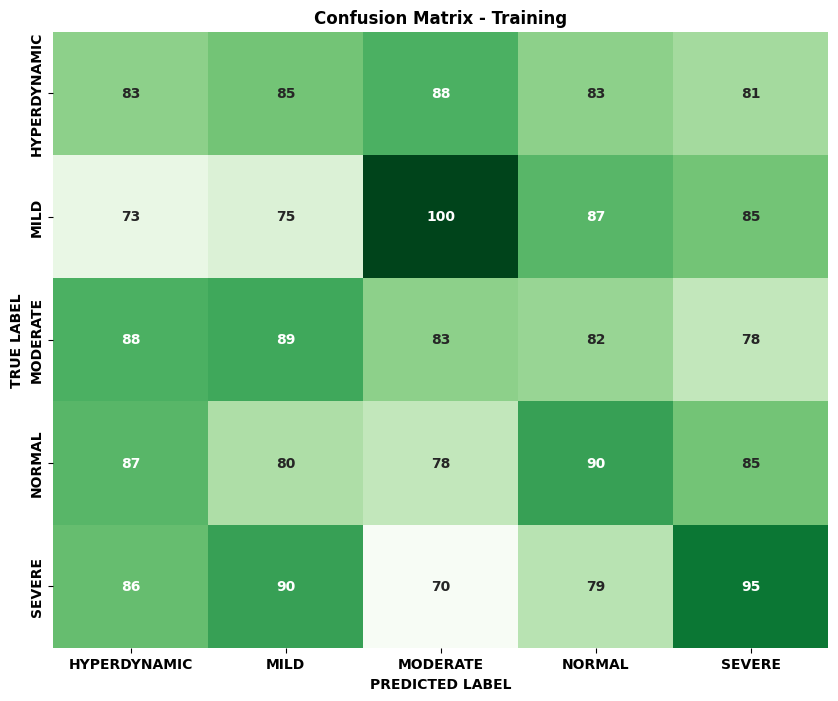

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step


W0000 00:00:1718555952.366999     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.21      0.20      0.20       120
        MILD       0.21      0.17      0.19       120
    MODERATE       0.21      0.23      0.22       120
      NORMAL       0.12      0.12      0.12       120
      SEVERE       0.18      0.19      0.19       120

    accuracy                           0.18       600
   macro avg       0.19      0.18      0.18       600
weighted avg       0.19      0.18      0.18       600



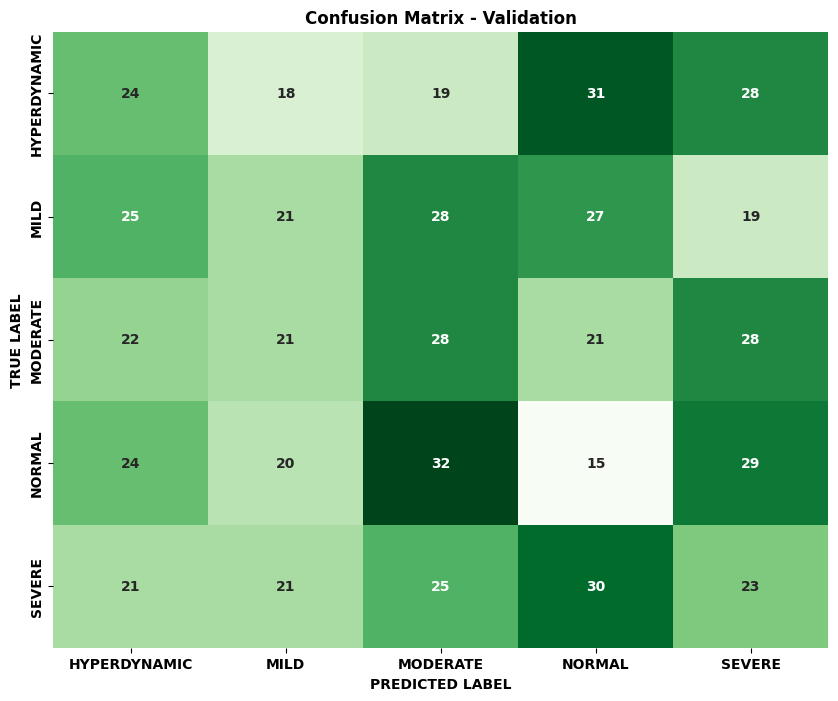

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step


W0000 00:00:1718555956.774330     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.92      0.93      0.93        60
        MILD       0.87      0.67      0.75        60
    MODERATE       0.76      0.90      0.82        60
      NORMAL       0.81      0.78      0.80        60
      SEVERE       0.84      0.90      0.87        60

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.83       300
weighted avg       0.84      0.84      0.83       300



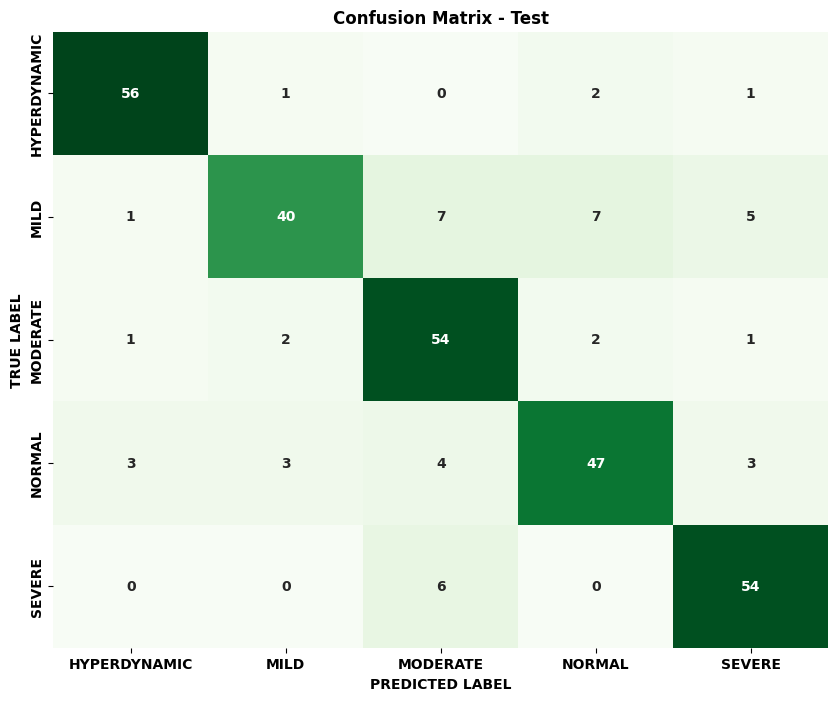

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


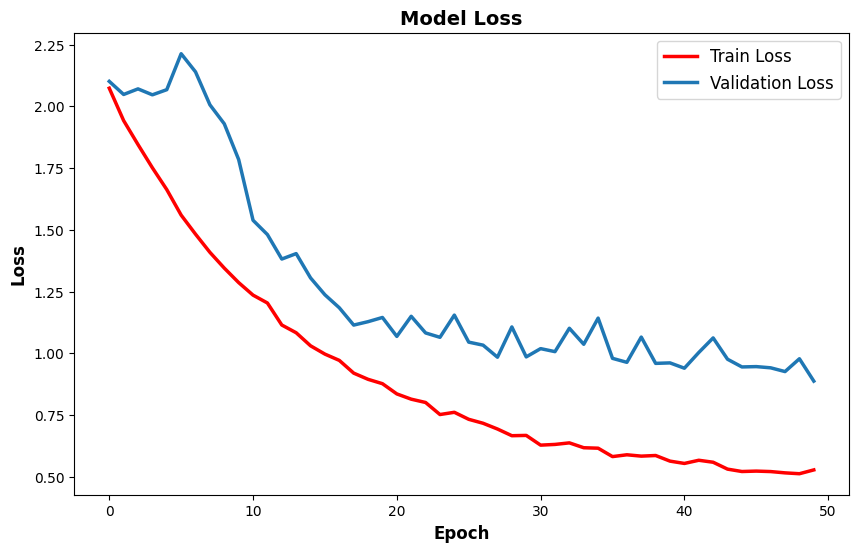

In [3]:
import matplotlib.pyplot as plt
A
# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

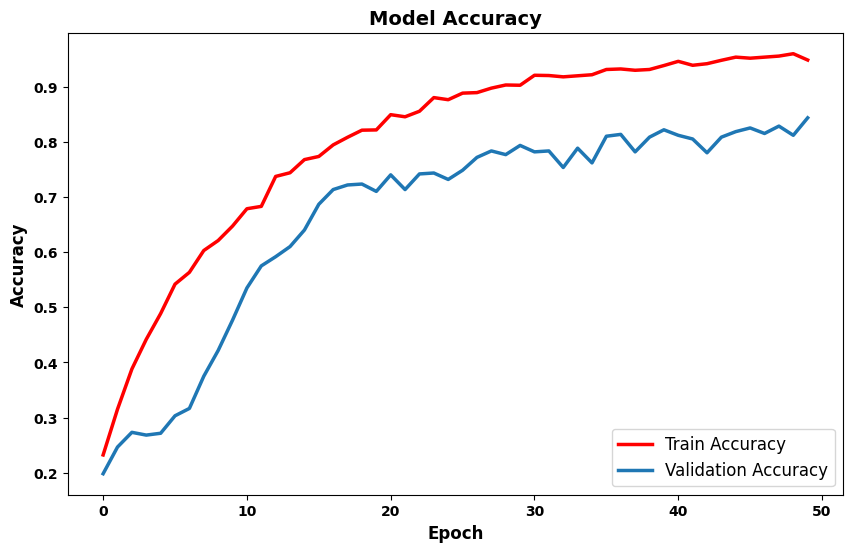

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [6]:
model.save('EFFFICIENTNETB0_ADAM.h5')

In [ ]:
#effB0

In [1]:
##EFFICENT NETB0 WITH RMSPROP 

import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb0_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB0 model
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train' # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation' # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test' # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb0_model(input_shape, NUM_CLASSES)

# Use RMSprop optimizer
optimizer = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Save metrics to Excel files (you can define this function as needed)
# save_metrics_to_excel(history, val_loss, val_accuracy, test_loss, test_accuracy, training_file, validation_file, test_file)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2024-06-16 23:31:37.393220: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 23:31:37.393336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 23:31:37.507903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718580798.192765     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718580798.288133     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/66 ━━━━━━━━━━━━━━━━━━━━ 14:05 14s/step - accuracy: 0.2131 - loss: 2.0891

W0000 00:00:1718580853.754138     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2231 - loss: 2.0778

W0000 00:00:1718580887.153084     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.2233 - loss: 2.0775 - val_accuracy: 0.2383 - val_loss: 2.0215
Epoch 2/50


W0000 00:00:1718580899.017562     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - accuracy: 0.3133 - loss: 1.9730 - val_accuracy: 0.3083 - val_loss: 1.9707
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 372ms/step - accuracy: 0.3914 - loss: 1.8723 - val_accuracy: 0.3483 - val_loss: 1.9268
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 367ms/step - accuracy: 0.4111 - loss: 1.7971 - val_accuracy: 0.2950 - val_loss: 1.9752
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 372ms/step - accuracy: 0.4383 - loss: 1.7221 - val_accuracy: 0.3250 - val_loss: 1.9889
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 369ms/step - accuracy: 0.5040 - loss: 1.6117 - val_accuracy: 0.3167 - val_loss: 2.0272
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 373ms/step - accuracy: 0.5583 - loss: 1.5096 - val_accuracy: 0.3567 - val_loss: 1.9387
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 369ms/step - accuracy: 0.5672 - loss: 1.4767 - val_accuracy: 0.3483 - val_loss: 2.0503
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 366ms/step - accuracy: 0.6163 - loss: 1.3805 - val_accuracy: 0.420

W0000 00:00:1718582248.343057     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 6:37 6s/step

W0000 00:00:1718583053.012392     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 448ms/step


W0000 00:00:1718583082.156954     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.20      0.19      0.19       420
        MILD       0.18      0.18      0.18       420
    MODERATE       0.19      0.20      0.20       420
      NORMAL       0.17      0.17      0.17       420
      SEVERE       0.20      0.20      0.20       420

    accuracy                           0.19      2100
   macro avg       0.19      0.19      0.19      2100
weighted avg       0.19      0.19      0.19      2100



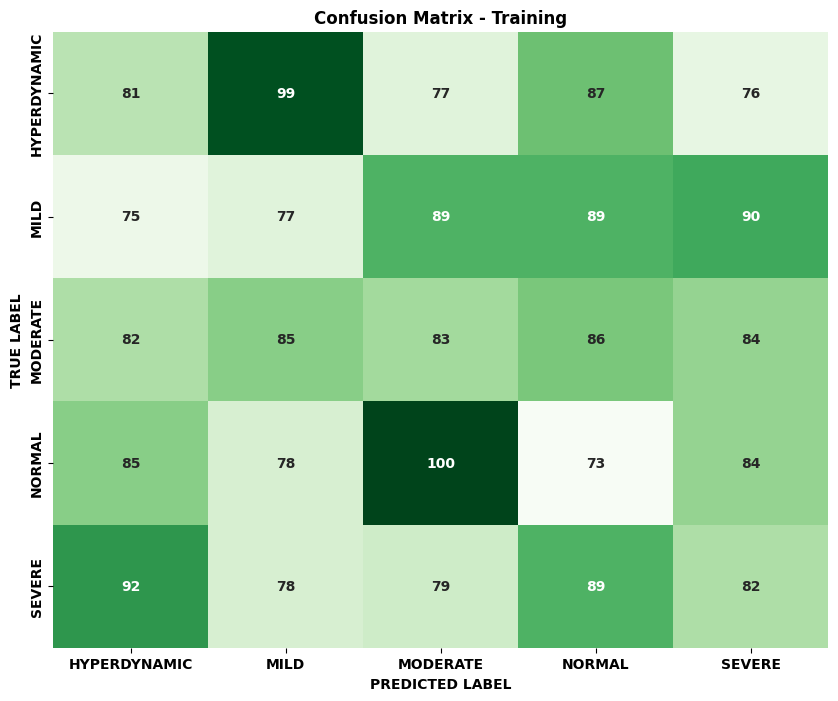

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step


W0000 00:00:1718583086.959466     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.19      0.19      0.19       120
        MILD       0.18      0.21      0.19       120
    MODERATE       0.23      0.23      0.23       120
      NORMAL       0.19      0.18      0.19       120
      SEVERE       0.21      0.20      0.21       120

    accuracy                           0.20       600
   macro avg       0.20      0.20      0.20       600
weighted avg       0.20      0.20      0.20       600



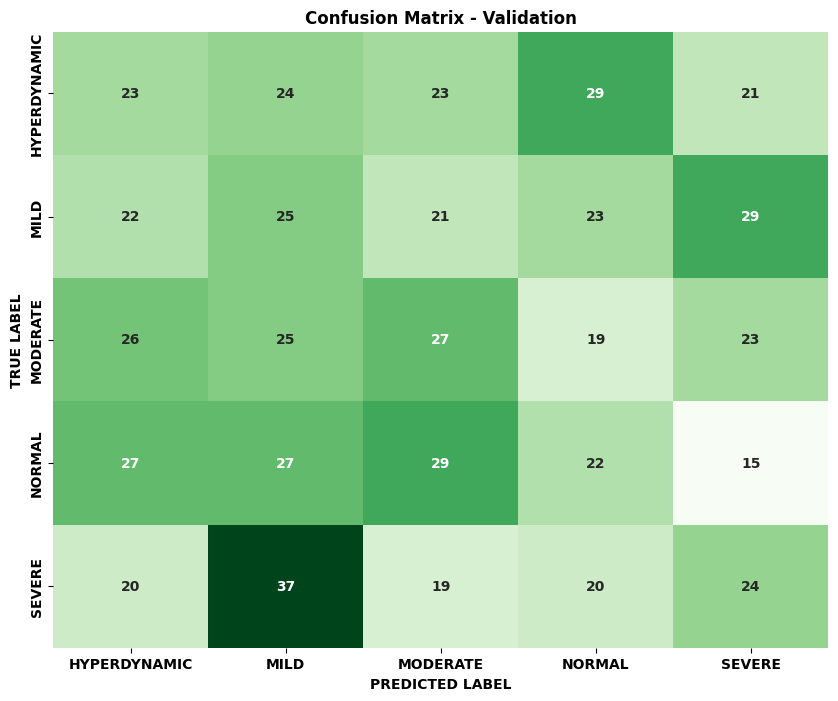

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 413ms/step


W0000 00:00:1718583091.197068     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.89      0.85      0.87        60
        MILD       0.70      0.83      0.76        60
    MODERATE       0.82      0.78      0.80        60
      NORMAL       0.77      0.72      0.74        60
      SEVERE       0.92      0.90      0.91        60

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



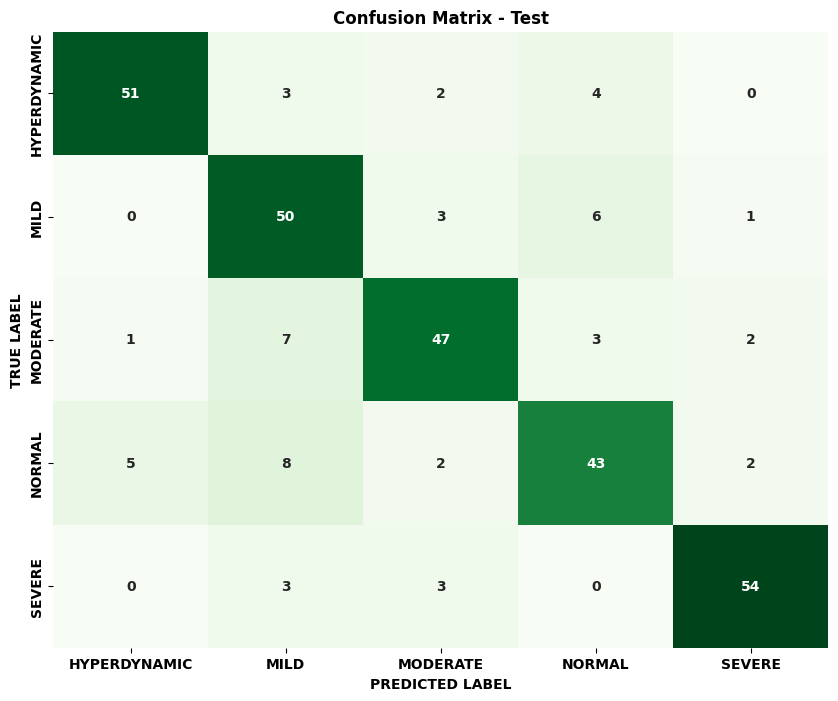

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


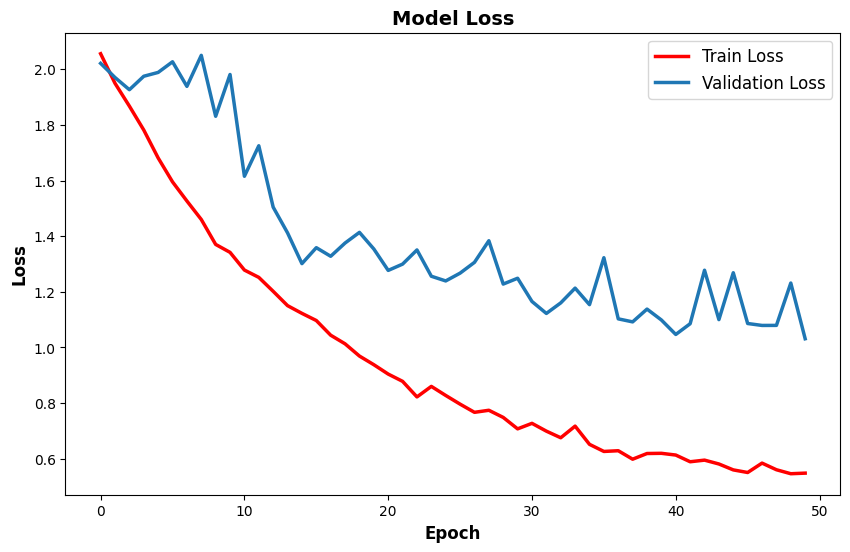

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

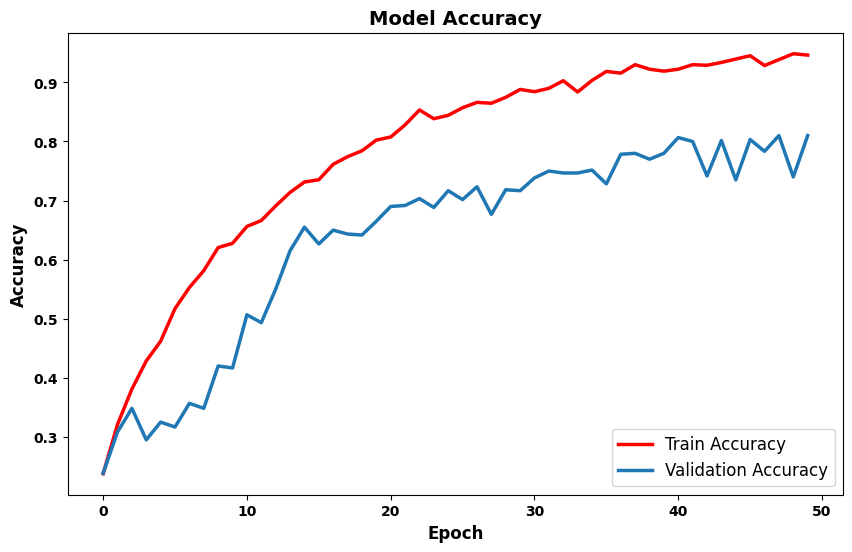

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [6]:
model.save('EFFICIENNERB1_RMS.h5')






















In [ ]:
##EFFICIENT NET B0 WITH SGD OPTIMIZER

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb0_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB0 model
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train' # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation' # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test' # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb0_model(input_shape, NUM_CLASSES)

# Use SGD optimizer
optimizer = optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Save metrics to Excel files (you can define this function as needed)
# save_metrics_to_excel(history, val_loss, val_accuracy, test_loss, test_accuracy, training_file, validation_file, test_file)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2024-06-17 03:22:53.592832: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 03:22:53.592957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 03:22:53.757513: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718594674.622504     127 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718594674.715717     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/66 ━━━━━━━━━━━━━━━━━━━━ 1:17 2s/step - accuracy: 0.2150 - loss: 2.1036  

W0000 00:00:1718594741.585688     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2136 - loss: 2.1078

W0000 00:00:1718594762.273021     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.2135 - loss: 2.1080 - val_accuracy: 0.1817 - val_loss: 2.1068
Epoch 2/50


W0000 00:00:1718594773.765163     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 373ms/step - accuracy: 0.2075 - loss: 2.1047 - val_accuracy: 0.1800 - val_loss: 2.1121
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 372ms/step - accuracy: 0.2140 - loss: 2.1064 - val_accuracy: 0.1650 - val_loss: 2.1093
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 375ms/step - accuracy: 0.1964 - loss: 2.0885 - val_accuracy: 0.1617 - val_loss: 2.0929
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 372ms/step - accuracy: 0.2132 - loss: 2.0980 - val_accuracy: 0.1817 - val_loss: 2.0773
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - accuracy: 0.2210 - loss: 2.0803 - val_accuracy: 0.2017 - val_loss: 2.0619
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 364ms/step - accuracy: 0.2272 - loss: 2.0619 - val_accuracy: 0.2067 - val_loss: 2.0545
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 367ms/step - accuracy: 0.2052 - loss: 2.0892 - val_accuracy: 0.2117 - val_loss: 2.0459
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 363ms/step - accuracy: 0.2402 - loss: 2.0484 - val_accuracy: 0.201

W0000 00:00:1718596100.236009     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 6:34 6s/step

W0000 00:00:1718596166.184254     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 445ms/step


W0000 00:00:1718596195.086877     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.20      0.19      0.19       420
        MILD       0.21      0.15      0.17       420
    MODERATE       0.23      0.37      0.29       420
      NORMAL       0.19      0.12      0.15       420
      SEVERE       0.18      0.20      0.19       420

    accuracy                           0.20      2100
   macro avg       0.20      0.20      0.20      2100
weighted avg       0.20      0.20      0.20      2100



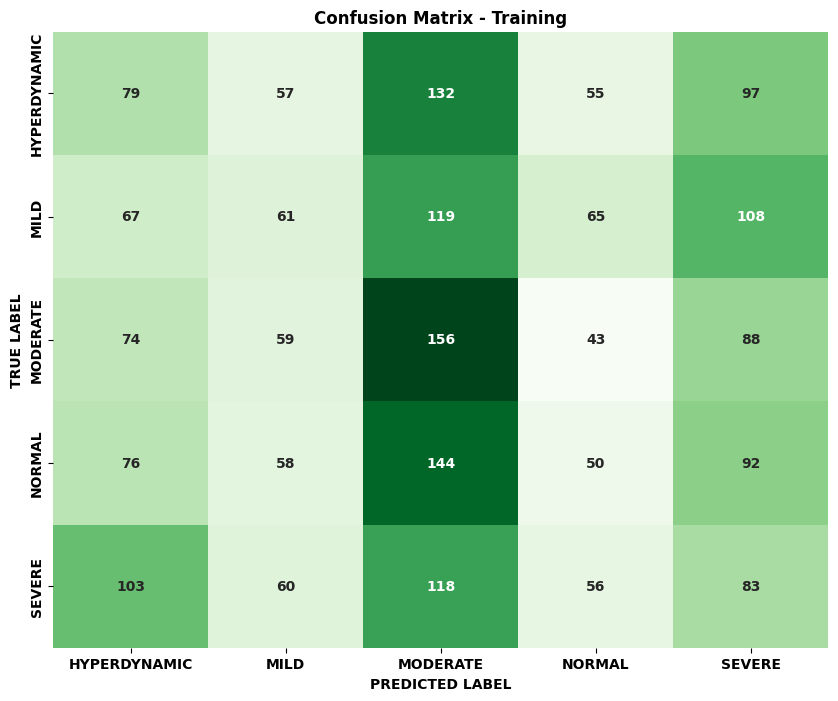

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step


W0000 00:00:1718596199.853567     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.17      0.17      0.17       120
        MILD       0.15      0.05      0.07       120
    MODERATE       0.19      0.28      0.23       120
      NORMAL       0.12      0.03      0.05       120
      SEVERE       0.20      0.38      0.27       120

    accuracy                           0.18       600
   macro avg       0.17      0.18      0.16       600
weighted avg       0.17      0.18      0.16       600



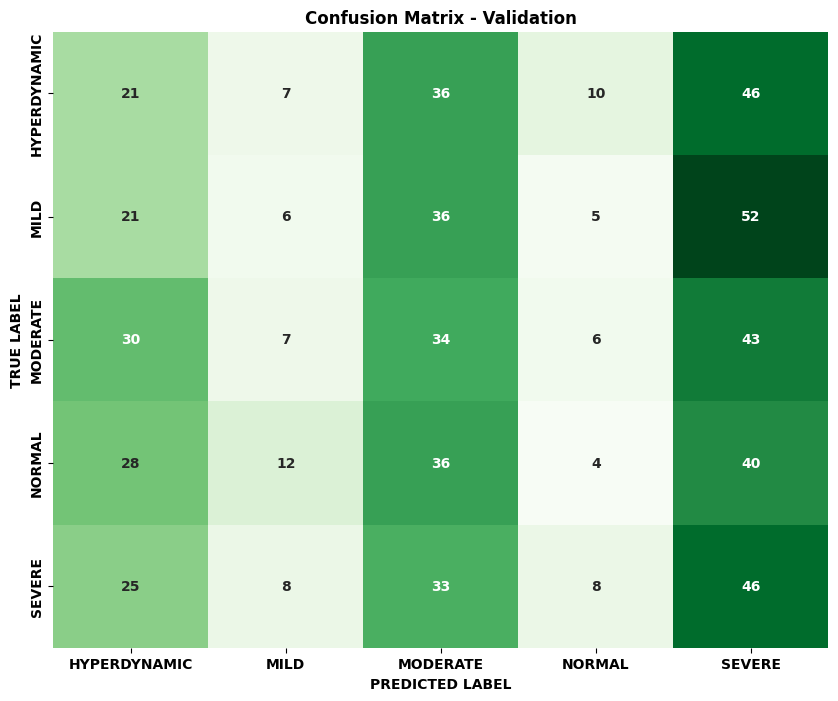

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 425ms/step


W0000 00:00:1718596204.186708     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.36      0.40      0.38        60
        MILD       0.35      0.15      0.21        60
    MODERATE       0.39      0.50      0.44        60
      NORMAL       0.24      0.08      0.12        60
      SEVERE       0.35      0.63      0.45        60

    accuracy                           0.35       300
   macro avg       0.34      0.35      0.32       300
weighted avg       0.34      0.35      0.32       300



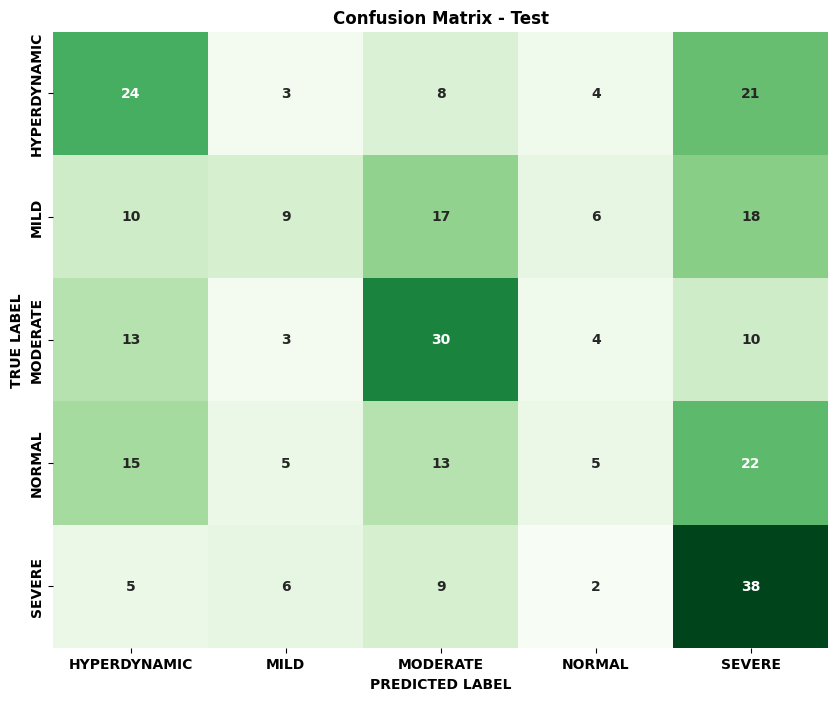

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


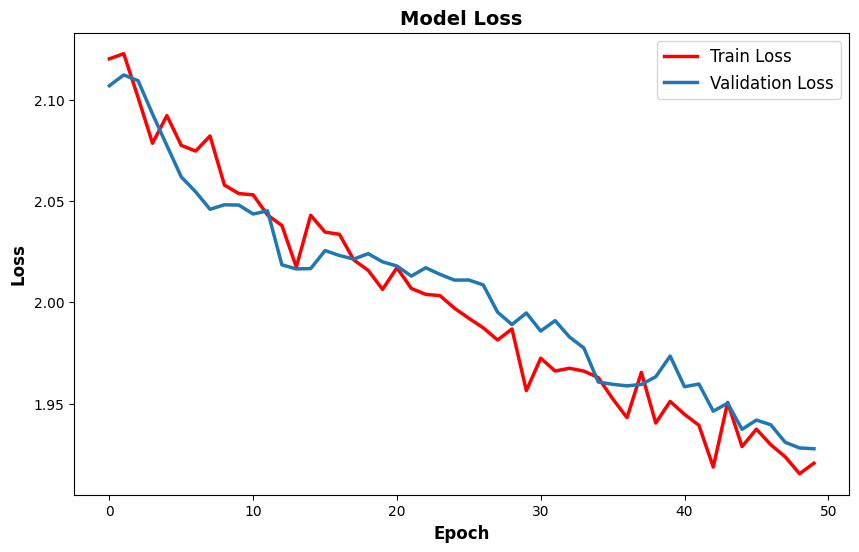

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

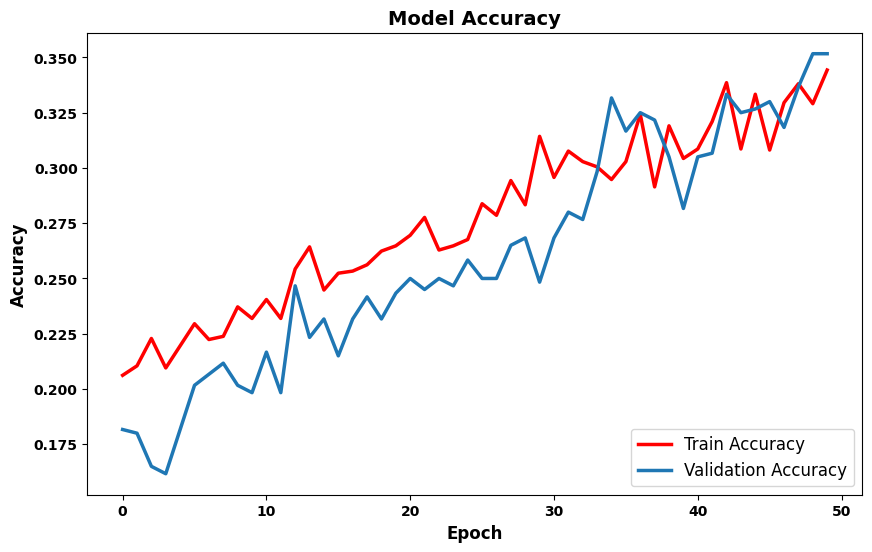

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [6]:
model.save('EFFICIENTNETB0_SGD.h5')

In [1]:
#EFFICIENT NET B0 WITH ADAMW OPTIMIZER
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb0_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB0 model
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb0_model(input_shape, NUM_CLASSES)

# Use AdamW optimizer
optimizer = optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2024-06-17 04:33:22.487889: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 04:33:22.487989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 04:33:22.761922: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718598935.561032     127 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718598935.674176     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/66 ━━━━━━━━━━━━━━━━━━━━ 2:53 4s/step - accuracy: 0.2133 - loss: 2.0997  

W0000 00:00:1718599007.483478     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2251 - loss: 2.0864

W0000 00:00:1718599037.116761     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.2254 - loss: 2.0859 - val_accuracy: 0.2350 - val_loss: 2.0383
Epoch 2/50


W0000 00:00:1718599049.960710     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 419ms/step - accuracy: 0.2974 - loss: 1.9727 - val_accuracy: 0.2650 - val_loss: 1.9963
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 420ms/step - accuracy: 0.3757 - loss: 1.8896 - val_accuracy: 0.2917 - val_loss: 1.9763
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 440ms/step - accuracy: 0.4140 - loss: 1.8005 - val_accuracy: 0.3150 - val_loss: 1.9548
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 424ms/step - accuracy: 0.4740 - loss: 1.7028 - val_accuracy: 0.3283 - val_loss: 1.9194
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 420ms/step - accuracy: 0.4850 - loss: 1.6499 - val_accuracy: 0.3033 - val_loss: 1.9679
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 428ms/step - accuracy: 0.5589 - loss: 1.5239 - val_accuracy: 0.2867 - val_loss: 2.0678
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 421ms/step - accuracy: 0.5742 - loss: 1.4955 - val_accuracy: 0.3567 - val_loss: 1.8935
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 419ms/step - accuracy: 0.6089 - loss: 1.4002 - val_accuracy: 0.393

W0000 00:00:1718600583.436558     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 7:00 6s/step

W0000 00:00:1718601765.291733     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 534ms/step


W0000 00:00:1718601800.022199     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.17      0.17      0.17       420
        MILD       0.22      0.22      0.22       420
    MODERATE       0.21      0.21      0.21       420
      NORMAL       0.21      0.21      0.21       420
      SEVERE       0.21      0.21      0.21       420

    accuracy                           0.20      2100
   macro avg       0.20      0.20      0.20      2100
weighted avg       0.20      0.20      0.20      2100



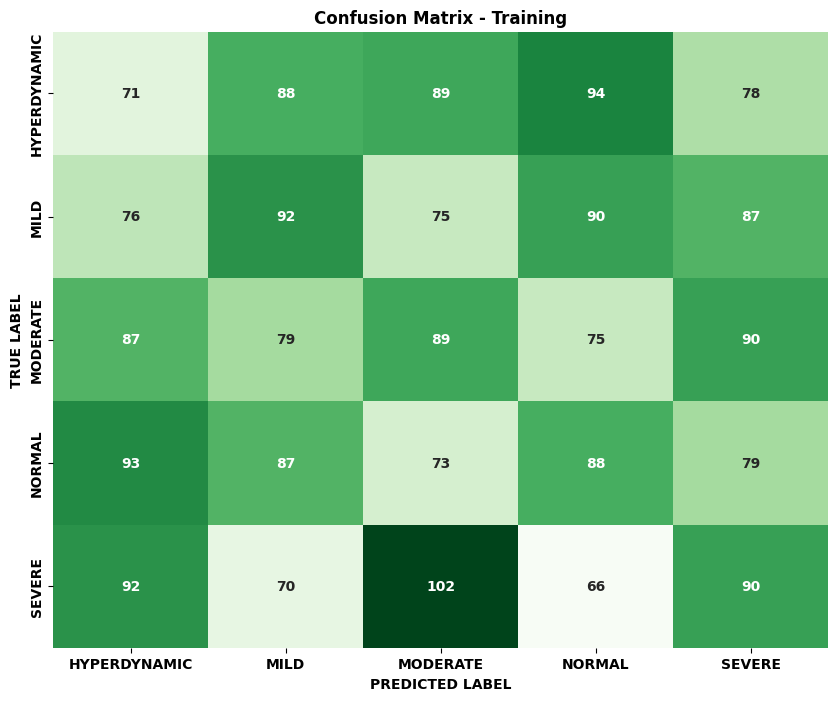

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step


W0000 00:00:1718601806.184372     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.20      0.20      0.20       120
        MILD       0.17      0.14      0.15       120
    MODERATE       0.16      0.16      0.16       120
      NORMAL       0.22      0.23      0.22       120
      SEVERE       0.23      0.27      0.25       120

    accuracy                           0.20       600
   macro avg       0.20      0.20      0.20       600
weighted avg       0.20      0.20      0.20       600



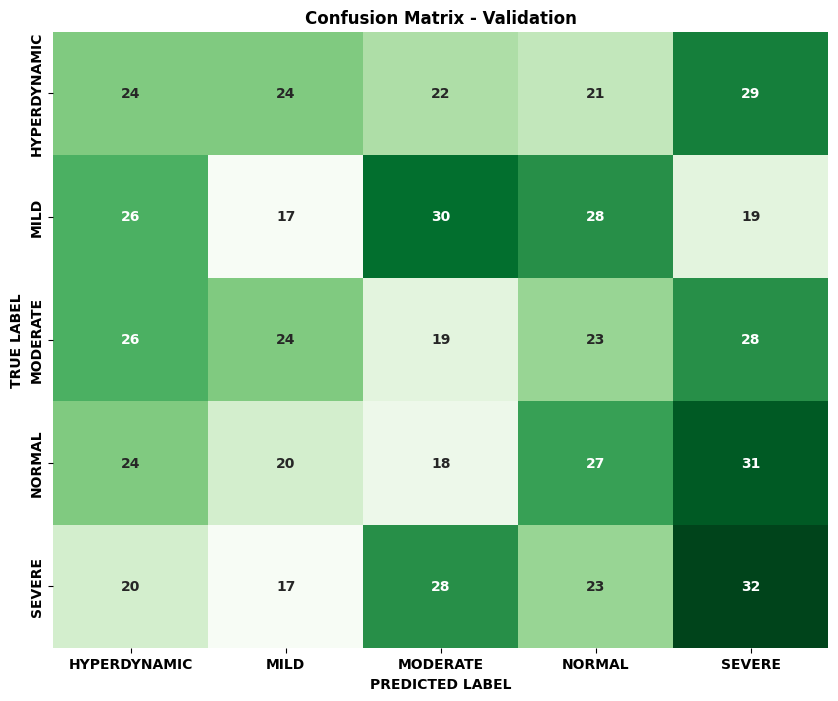

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step


W0000 00:00:1718601811.195631     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.80      0.92      0.85        60
        MILD       0.85      0.65      0.74        60
    MODERATE       0.84      0.82      0.83        60
      NORMAL       0.71      0.73      0.72        60
      SEVERE       0.88      0.95      0.91        60

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



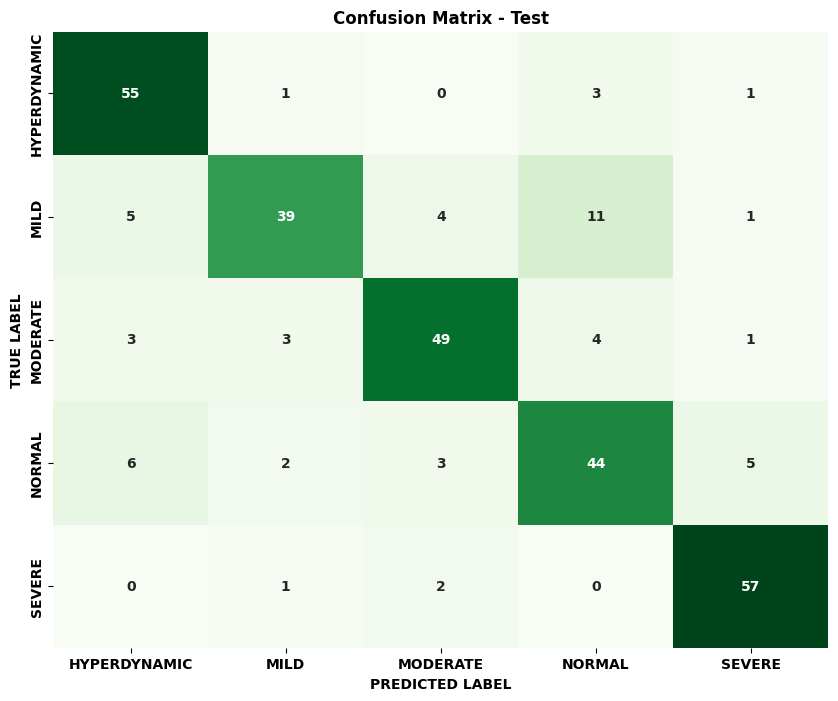

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


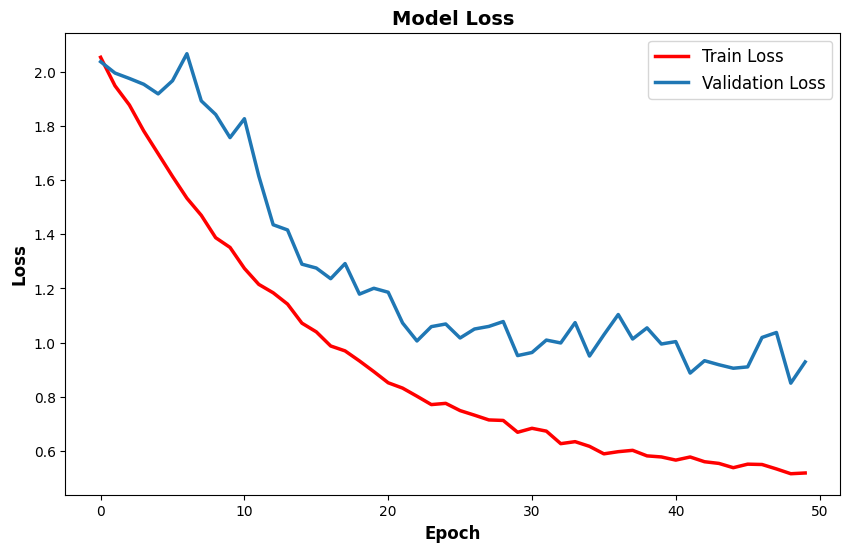

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

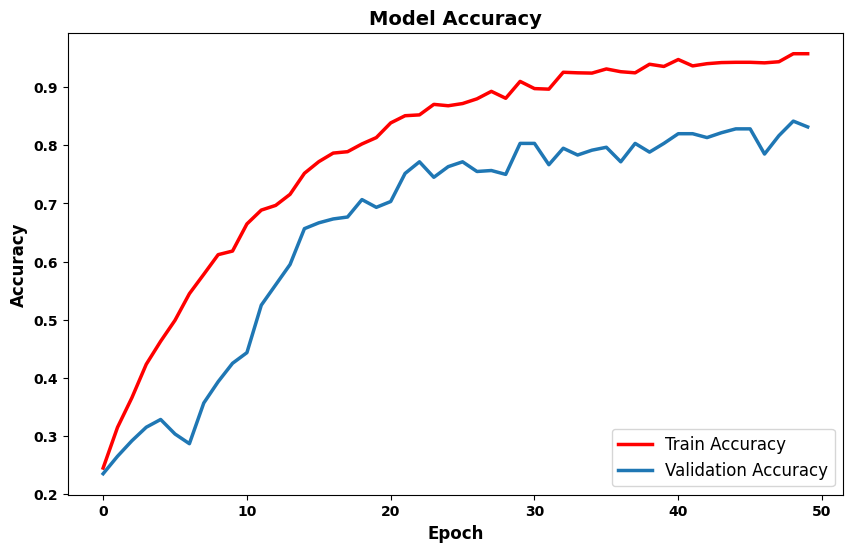

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [5]:
model.save('EFFICIENTNETB0_ADAMW.h5')

In [ ]:
#########     

In [6]:
#EFFICIENT NET B1 WITH ADAM OPTIMIZER
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb1_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB1 model
    base_model = EfficientNetB1(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb1_model(input_shape, NUM_CLASSES)

# Use Adam optimizer
optimizer = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/66 ━━━━━━━━━━━━━━━━━━━━ 2:26:44 135s/step - accuracy: 0.1562 - loss: 2.1056

W0000 00:00:1718603569.780646     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 3/66 ━━━━━━━━━━━━━━━━━━━━ 45:09 43s/step - accuracy: 0.1414 - loss: 2.1423  

W0000 00:00:1718603655.868229     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2077 - loss: 2.0987

W0000 00:00:1718603691.727745     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.2081 - loss: 2.0983 - val_accuracy: 0.2500 - val_loss: 2.0369
Epoch 2/50


W0000 00:00:1718603699.844797     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 433ms/step - accuracy: 0.3129 - loss: 1.9659 - val_accuracy: 0.3217 - val_loss: 1.9379
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 424ms/step - accuracy: 0.3502 - loss: 1.8893 - val_accuracy: 0.3517 - val_loss: 1.8546
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 424ms/step - accuracy: 0.4185 - loss: 1.7851 - val_accuracy: 0.4233 - val_loss: 1.7652
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 425ms/step - accuracy: 0.5033 - loss: 1.6512 - val_accuracy: 0.4200 - val_loss: 1.7999
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 431ms/step - accuracy: 0.5129 - loss: 1.5964 - val_accuracy: 0.4617 - val_loss: 1.6990
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 423ms/step - accuracy: 0.5812 - loss: 1.4604 - val_accuracy: 0.4300 - val_loss: 1.8302
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 421ms/step - accuracy: 0.6171 - loss: 1.3861 - val_accuracy: 0.5167 - val_loss: 1.5924
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 423ms/step - accuracy: 0.6301 - loss: 1.3228 - val_accuracy: 0.511

W0000 00:00:1718605259.689936     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 9:15 9s/step

W0000 00:00:1718605293.115083     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 44s 541ms/step


W0000 00:00:1718605328.310050     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.20      0.20      0.20       420
        MILD       0.20      0.20      0.20       420
    MODERATE       0.22      0.22      0.22       420
      NORMAL       0.21      0.21      0.21       420
      SEVERE       0.18      0.18      0.18       420

    accuracy                           0.20      2100
   macro avg       0.20      0.20      0.20      2100
weighted avg       0.20      0.20      0.20      2100



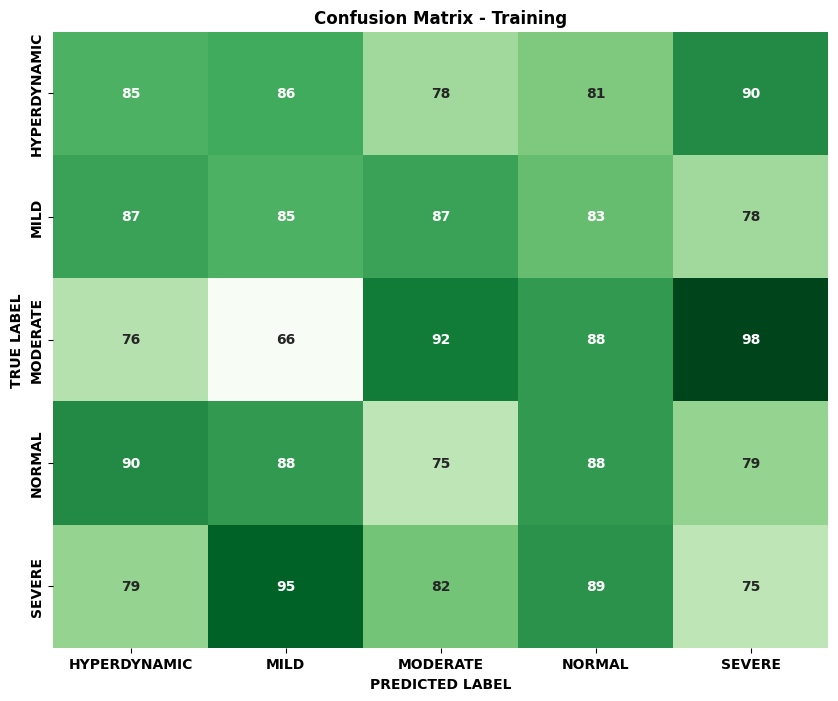

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step


W0000 00:00:1718605335.042753     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.23      0.23      0.23       120
        MILD       0.18      0.16      0.17       120
    MODERATE       0.21      0.15      0.18       120
      NORMAL       0.23      0.34      0.28       120
      SEVERE       0.19      0.19      0.19       120

    accuracy                           0.21       600
   macro avg       0.21      0.21      0.21       600
weighted avg       0.21      0.21      0.21       600



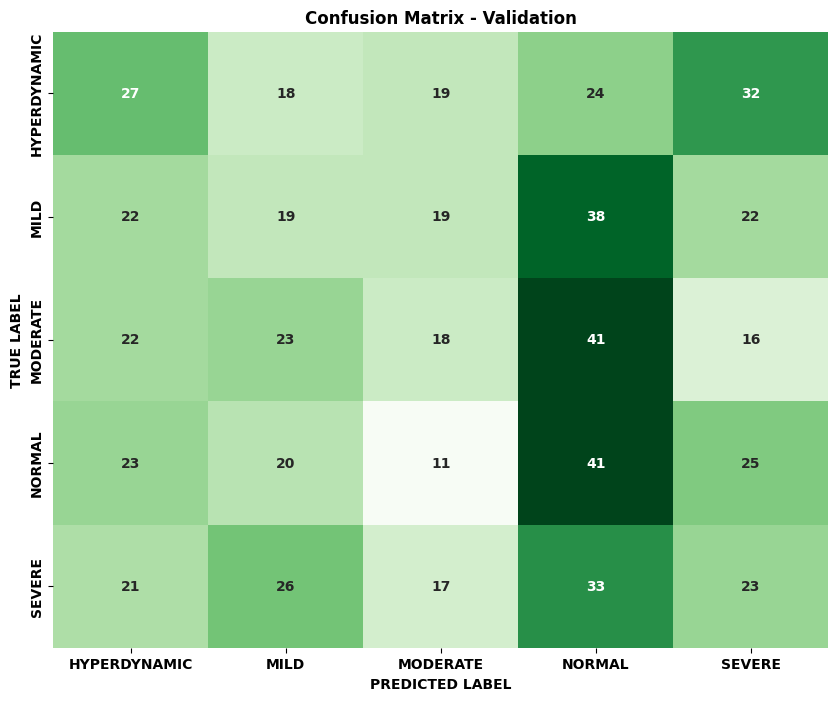

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 615ms/step


W0000 00:00:1718605341.115818     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.90      0.88      0.89        60
        MILD       0.82      0.70      0.76        60
    MODERATE       0.93      0.67      0.78        60
      NORMAL       0.64      0.90      0.74        60
      SEVERE       0.94      0.97      0.95        60

    accuracy                           0.82       300
   macro avg       0.84      0.82      0.82       300
weighted avg       0.84      0.82      0.82       300



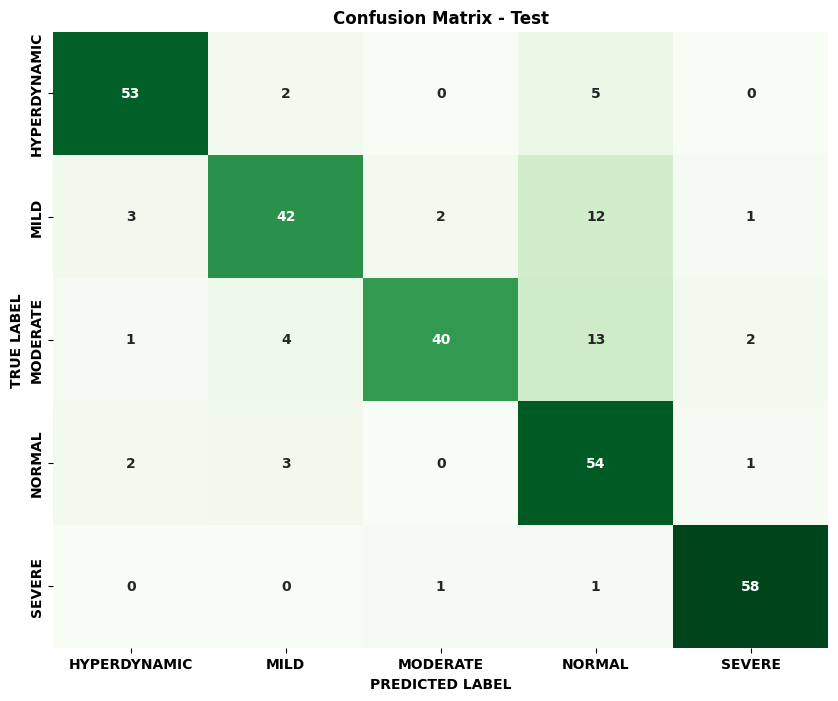

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


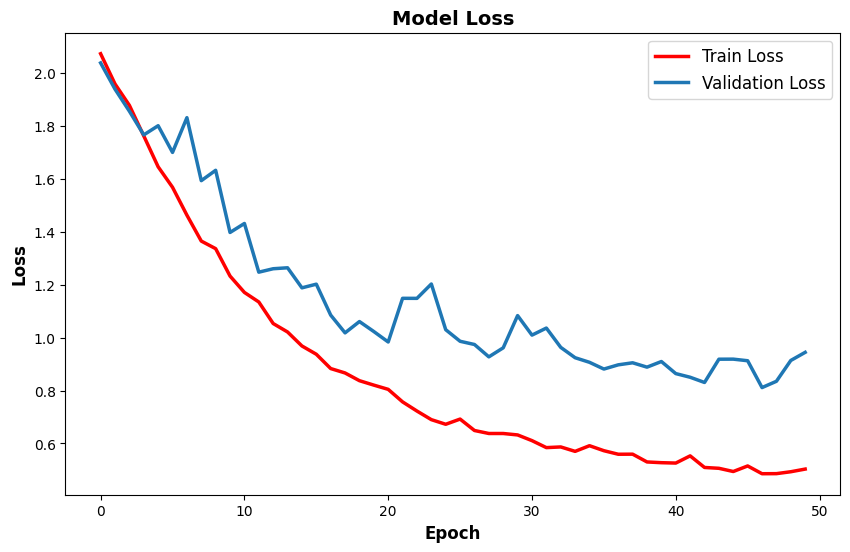

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

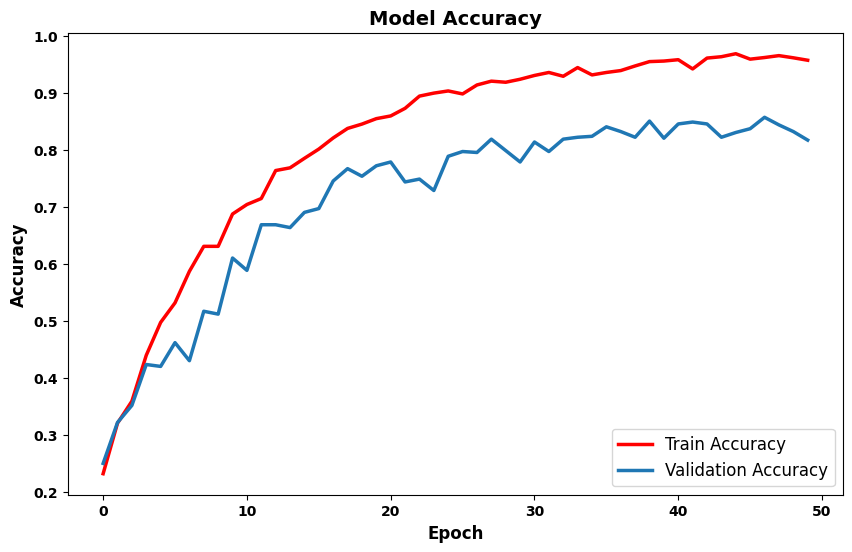

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [12]:
model.save('EFFICIENTNETB1_adam.h5')

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb1_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB1 model
    base_model = EfficientNetB1(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb1_model(input_shape, NUM_CLASSES)

# Use optimizer
optimizer = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2024-06-17 07:55:40.231216: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 07:55:40.231319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 07:55:40.331450: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718611076.523120     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718611076.649812     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/66 ━━━━━━━━━━━━━━━━━━━━ 7:22 8s/step - accuracy: 0.2132 - loss: 2.0836  

W0000 00:00:1718611157.089705     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2382 - loss: 2.0704

W0000 00:00:1718611188.793530     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.2385 - loss: 2.0700 - val_accuracy: 0.2417 - val_loss: 2.0428
Epoch 2/50


W0000 00:00:1718611202.181512     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 373ms/step - accuracy: 0.2984 - loss: 1.9675 - val_accuracy: 0.2883 - val_loss: 1.9914
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 382ms/step - accuracy: 0.3652 - loss: 1.8717 - val_accuracy: 0.3150 - val_loss: 1.9821
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 372ms/step - accuracy: 0.4111 - loss: 1.7643 - val_accuracy: 0.3583 - val_loss: 1.9898
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 373ms/step - accuracy: 0.5077 - loss: 1.6521 - val_accuracy: 0.4300 - val_loss: 1.8535
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - accuracy: 0.5269 - loss: 1.5440 - val_accuracy: 0.4550 - val_loss: 1.7751
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 383ms/step - accuracy: 0.5649 - loss: 1.4918 - val_accuracy: 0.4650 - val_loss: 1.7355
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 370ms/step - accuracy: 0.6176 - loss: 1.3652 - val_accuracy: 0.5167 - val_loss: 1.6126
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 371ms/step - accuracy: 0.6373 - loss: 1.3491 - val_accuracy: 0.558

W0000 00:00:1718612557.296945     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 9:01 8s/step

W0000 00:00:1718612605.214144     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 471ms/step


W0000 00:00:1718612635.822762     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.21      0.20      0.21       420
        MILD       0.22      0.22      0.22       420
    MODERATE       0.20      0.20      0.20       420
      NORMAL       0.17      0.17      0.17       420
      SEVERE       0.20      0.20      0.20       420

    accuracy                           0.20      2100
   macro avg       0.20      0.20      0.20      2100
weighted avg       0.20      0.20      0.20      2100



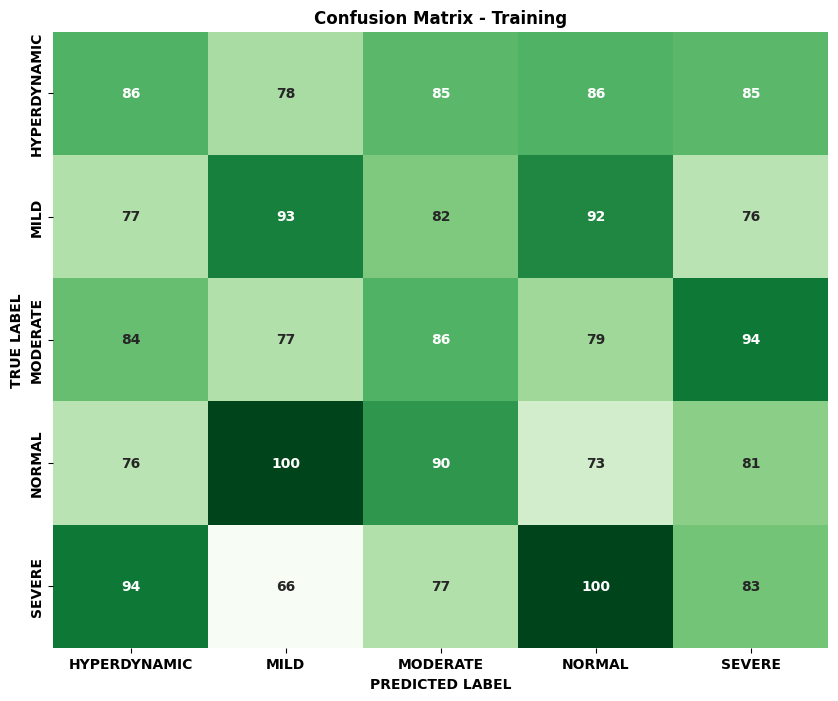

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step


W0000 00:00:1718612641.482600     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.16      0.16      0.16       120
        MILD       0.19      0.16      0.17       120
    MODERATE       0.20      0.19      0.19       120
      NORMAL       0.19      0.25      0.22       120
      SEVERE       0.23      0.22      0.22       120

    accuracy                           0.20       600
   macro avg       0.20      0.20      0.19       600
weighted avg       0.20      0.20      0.19       600



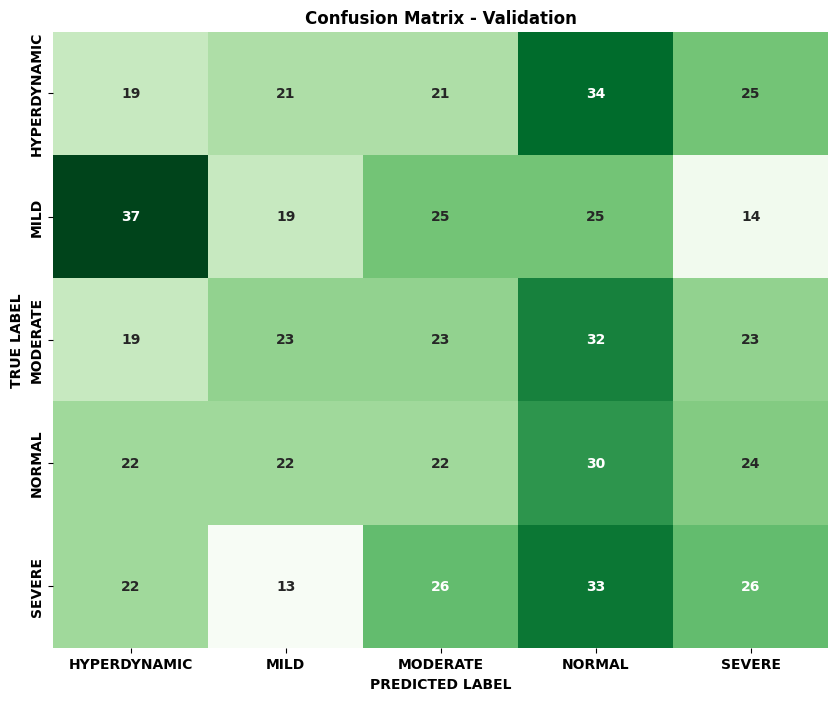

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 569ms/step


W0000 00:00:1718612647.098340     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.84      0.87      0.85        60
        MILD       0.93      0.70      0.80        60
    MODERATE       0.89      0.78      0.83        60
      NORMAL       0.65      0.90      0.76        60
      SEVERE       0.98      0.93      0.96        60

    accuracy                           0.84       300
   macro avg       0.86      0.84      0.84       300
weighted avg       0.86      0.84      0.84       300



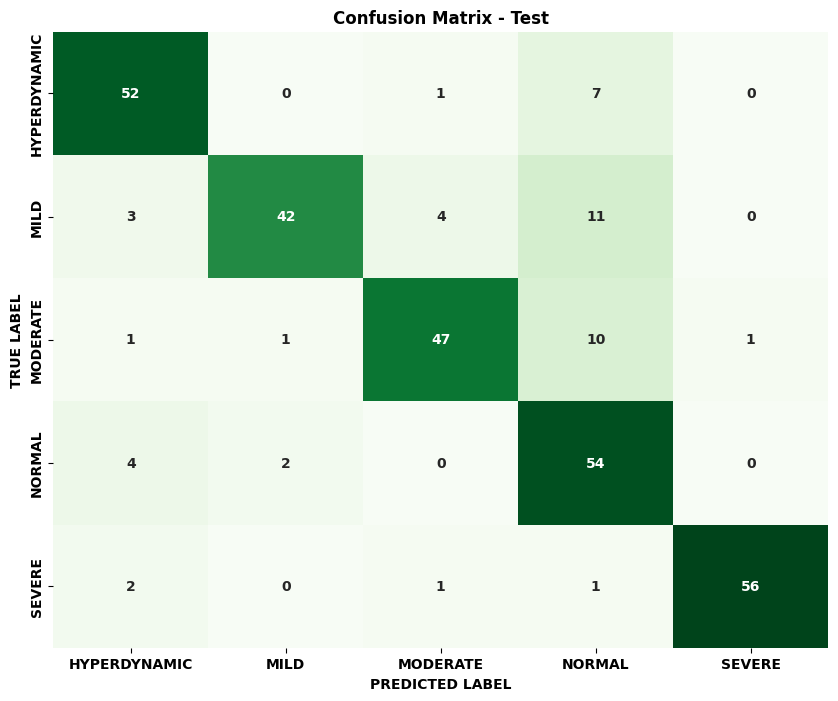

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


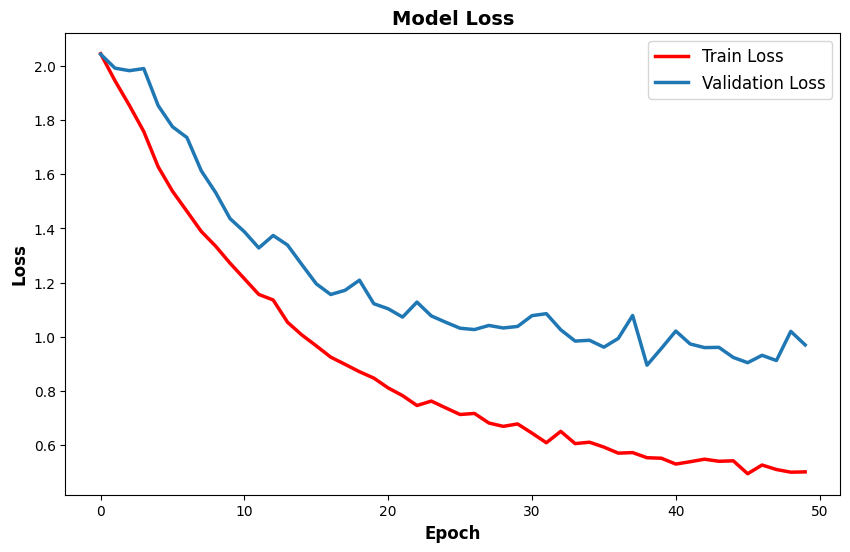

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

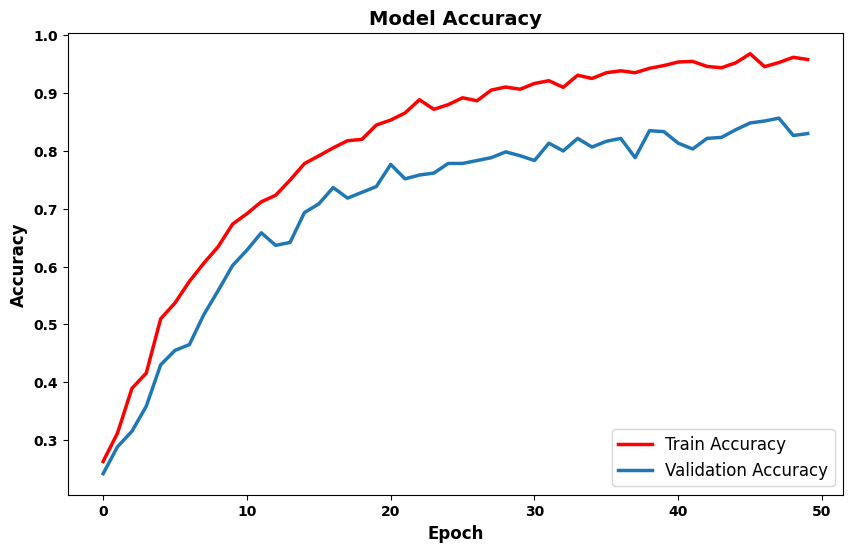

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [5]:
model.save('EFFICIENTNETB1_RMS.h5')

In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb1_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB1 model
    base_model = EfficientNetB1(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb1_model(input_shape, NUM_CLASSES)

# Use SGD optimizer
optimizer = optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/66 ━━━━━━━━━━━━━━━━━━━━ 1:40:10 92s/step - accuracy: 0.2188 - loss: 2.1473

W0000 00:00:1718613524.689586     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 3/66 ━━━━━━━━━━━━━━━━━━━━ 31:25 30s/step - accuracy: 0.1806 - loss: 2.1353 

W0000 00:00:1718613584.623279     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2043 - loss: 2.1164

W0000 00:00:1718613617.446401     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.2044 - loss: 2.1165 - val_accuracy: 0.1917 - val_loss: 2.0791
Epoch 2/50


W0000 00:00:1718613623.068454     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 71s 396ms/step - accuracy: 0.2044 - loss: 2.0938 - val_accuracy: 0.2133 - val_loss: 2.0496
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - accuracy: 0.2190 - loss: 2.1022 - val_accuracy: 0.2283 - val_loss: 2.0356
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 387ms/step - accuracy: 0.2034 - loss: 2.1070 - val_accuracy: 0.2467 - val_loss: 2.0308
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 377ms/step - accuracy: 0.2111 - loss: 2.0882 - val_accuracy: 0.2517 - val_loss: 2.0253
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 381ms/step - accuracy: 0.2156 - loss: 2.0726 - val_accuracy: 0.2217 - val_loss: 2.0279
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 391ms/step - accuracy: 0.2250 - loss: 2.0702 - val_accuracy: 0.2067 - val_loss: 2.0333
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 378ms/step - accuracy: 0.2352 - loss: 2.0624 - val_accuracy: 0.2250 - val_loss: 2.0296
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 383ms/step - accuracy: 0.2267 - loss: 2.0527 - val_accuracy: 0.220

W0000 00:00:1718615033.613032     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 374ms/step

Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.19      0.19      0.19       420
        MILD       0.23      0.17      0.19       420
    MODERATE       0.19      0.24      0.21       420
      NORMAL       0.18      0.17      0.17       420
      SEVERE       0.23      0.26      0.24       420

    accuracy                           0.20      2100
   macro avg       0.20      0.20      0.20      2100
weighted avg       0.20      0.20      0.20      2100



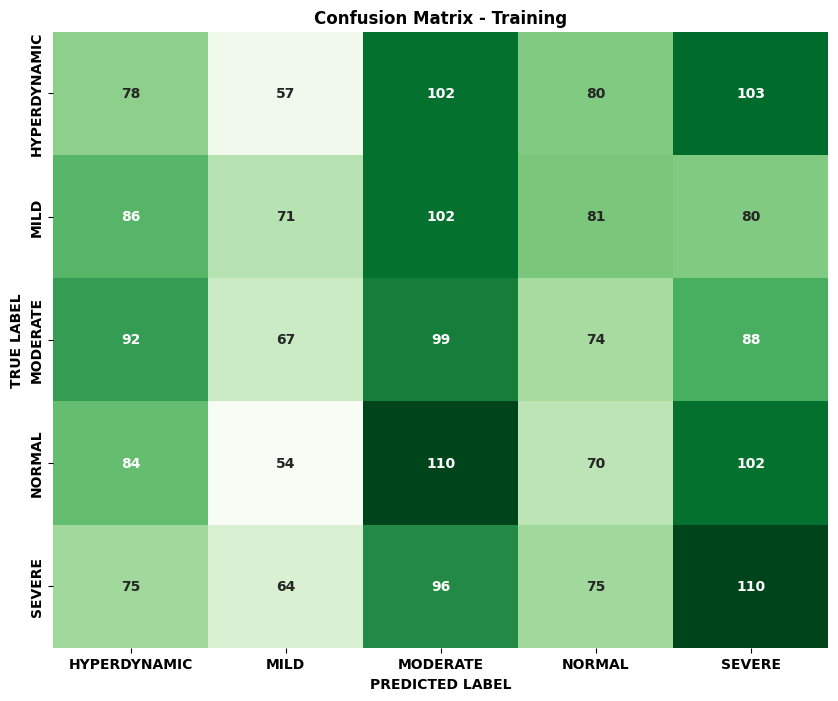

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step

Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.23      0.23      0.23       120
        MILD       0.23      0.12      0.15       120
    MODERATE       0.19      0.19      0.19       120
      NORMAL       0.19      0.10      0.13       120
      SEVERE       0.20      0.39      0.26       120

    accuracy                           0.20       600
   macro avg       0.21      0.20      0.19       600
weighted avg       0.21      0.20      0.19       600



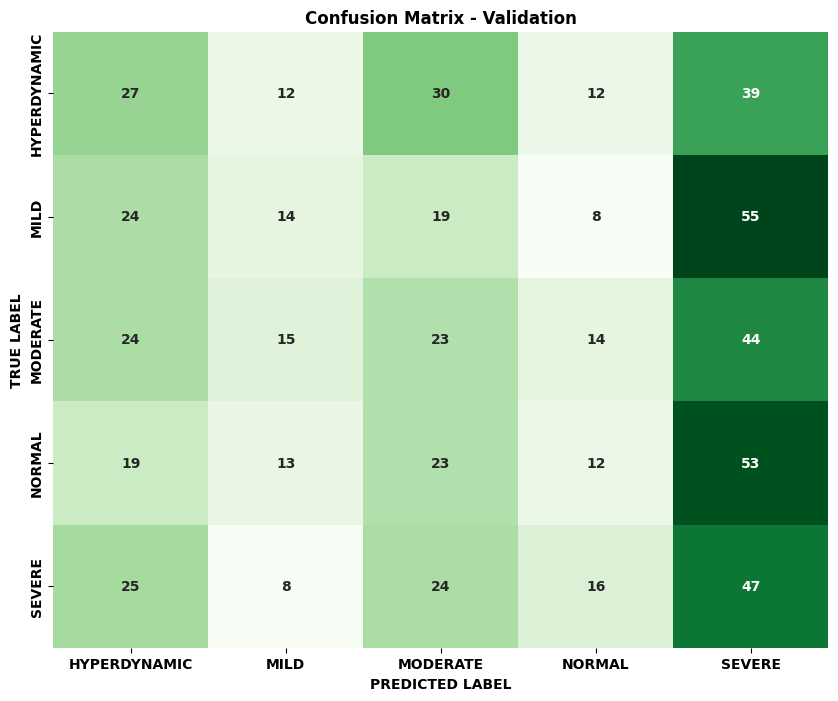

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step

Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.34      0.27      0.30        60
        MILD       0.41      0.18      0.25        60
    MODERATE       0.32      0.37      0.34        60
      NORMAL       0.39      0.18      0.25        60
      SEVERE       0.35      0.75      0.47        60

    accuracy                           0.35       300
   macro avg       0.36      0.35      0.32       300
weighted avg       0.36      0.35      0.32       300



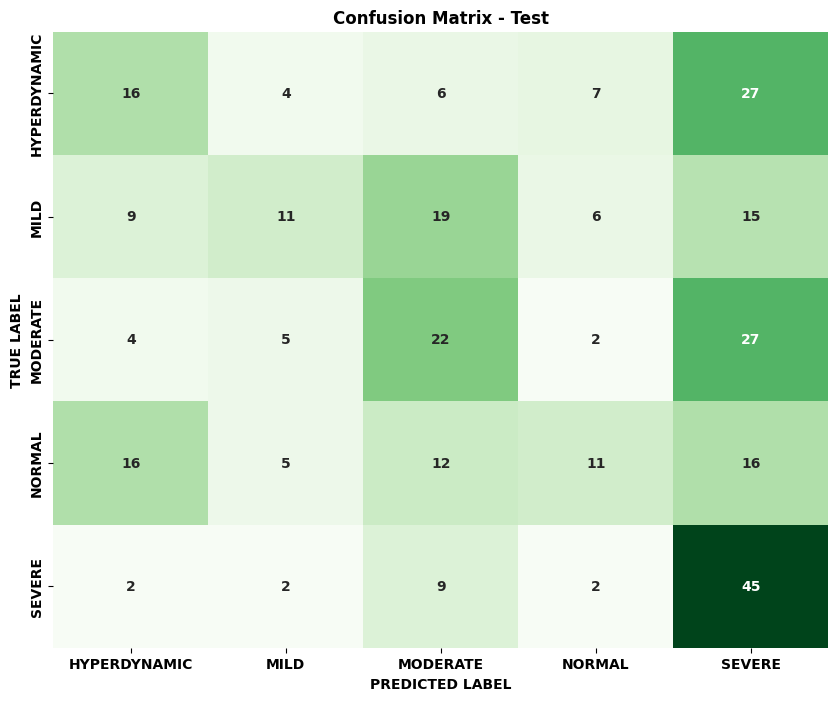

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


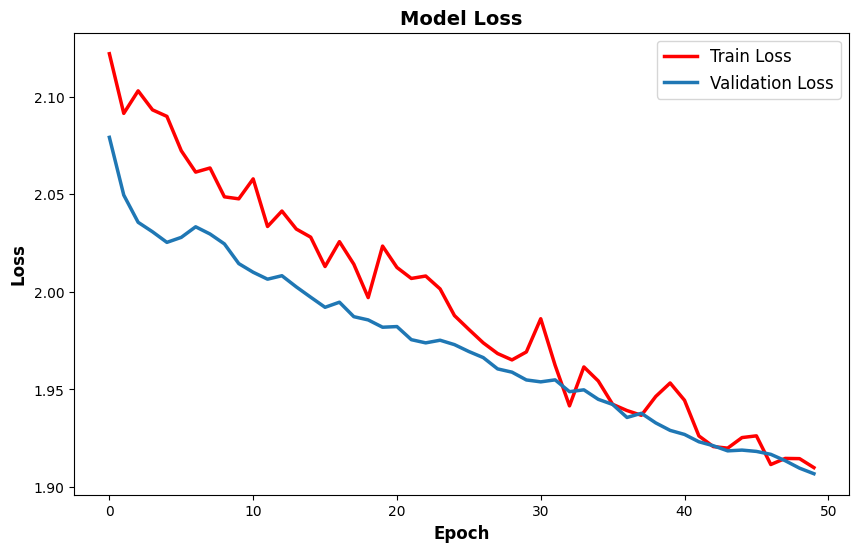

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

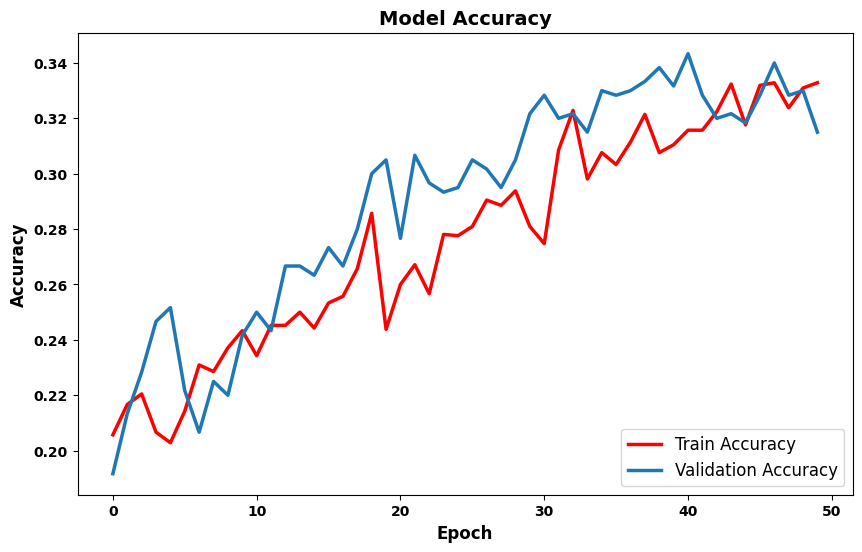

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [20]:
model.save('EFFICIENNETB1_SGD.h5')

In [1]:
#EFFICIENT NET B1 WITH ADAMW
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb1_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB1 model
    base_model = EfficientNetB1(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb1_model(input_shape, NUM_CLASSES)

# Use AdamW optimizer
optimizer = optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2024-06-17 10:39:15.730390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 10:39:15.730491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 10:39:15.849548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718620918.534036     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718620918.681772     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/66 ━━━━━━━━━━━━━━━━━━━━ 2:34 4s/step - accuracy: 0.2042 - loss: 2.1105  

W0000 00:00:1718621015.605687     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2238 - loss: 2.0888

W0000 00:00:1718621041.023535     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.2241 - loss: 2.0884 - val_accuracy: 0.2617 - val_loss: 2.0359
Epoch 2/50


W0000 00:00:1718621054.950113     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 373ms/step - accuracy: 0.3278 - loss: 1.9518 - val_accuracy: 0.3017 - val_loss: 1.9590
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 375ms/step - accuracy: 0.3897 - loss: 1.8488 - val_accuracy: 0.3217 - val_loss: 1.9503
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 374ms/step - accuracy: 0.4344 - loss: 1.7431 - val_accuracy: 0.3217 - val_loss: 1.9914
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 376ms/step - accuracy: 0.5022 - loss: 1.6413 - val_accuracy: 0.2967 - val_loss: 2.2189
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 377ms/step - accuracy: 0.5333 - loss: 1.5280 - val_accuracy: 0.3500 - val_loss: 2.0606
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 371ms/step - accuracy: 0.5725 - loss: 1.4610 - val_accuracy: 0.3567 - val_loss: 2.0530
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 374ms/step - accuracy: 0.6434 - loss: 1.3446 - val_accuracy: 0.3567 - val_loss: 1.9952
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 378ms/step - accuracy: 0.6483 - loss: 1.3259 - val_accuracy: 0.518

W0000 00:00:1718622421.172035     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 487ms/step


W0000 00:00:1718623228.020474     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.20      0.20      0.20       420
        MILD       0.17      0.17      0.17       420
    MODERATE       0.20      0.20      0.20       420
      NORMAL       0.23      0.23      0.23       420
      SEVERE       0.22      0.22      0.22       420

    accuracy                           0.20      2100
   macro avg       0.20      0.20      0.20      2100
weighted avg       0.20      0.20      0.20      2100



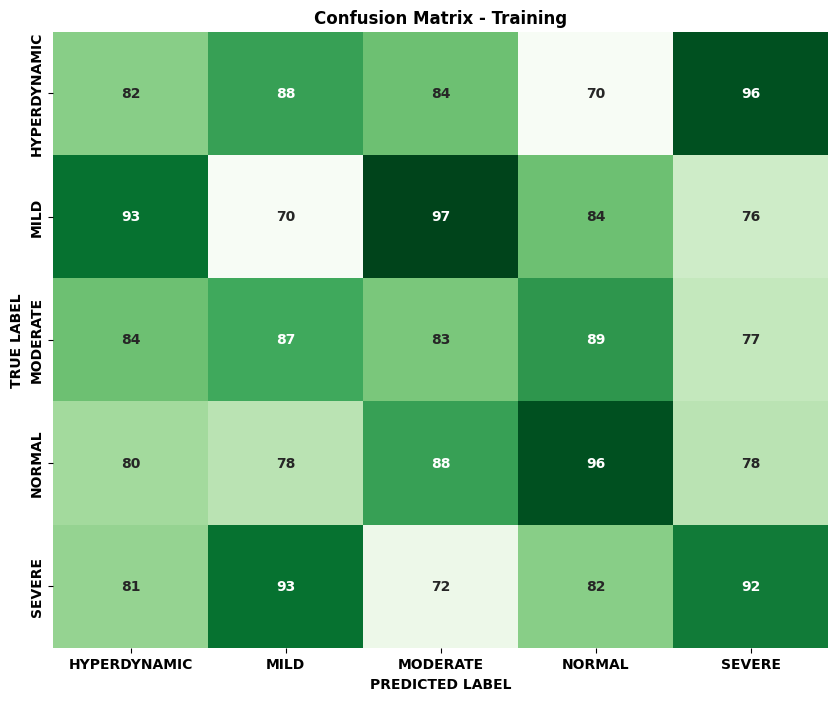

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step


W0000 00:00:1718623234.294153     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.20      0.17      0.19       120
        MILD       0.16      0.12      0.14       120
    MODERATE       0.25      0.23      0.24       120
      NORMAL       0.14      0.19      0.16       120
      SEVERE       0.16      0.17      0.16       120

    accuracy                           0.18       600
   macro avg       0.18      0.18      0.18       600
weighted avg       0.18      0.18      0.18       600



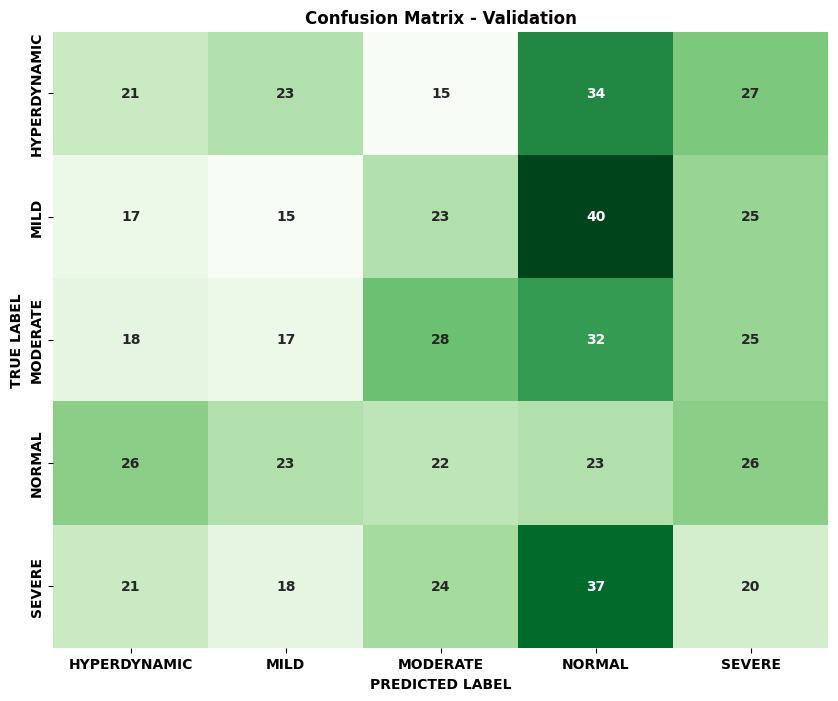

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 531ms/step


W0000 00:00:1718623239.648083     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.89      0.82      0.85        60
        MILD       0.90      0.72      0.80        60
    MODERATE       0.94      0.80      0.86        60
      NORMAL       0.66      0.93      0.77        60
      SEVERE       0.98      1.00      0.99        60

    accuracy                           0.85       300
   macro avg       0.87      0.85      0.86       300
weighted avg       0.87      0.85      0.86       300



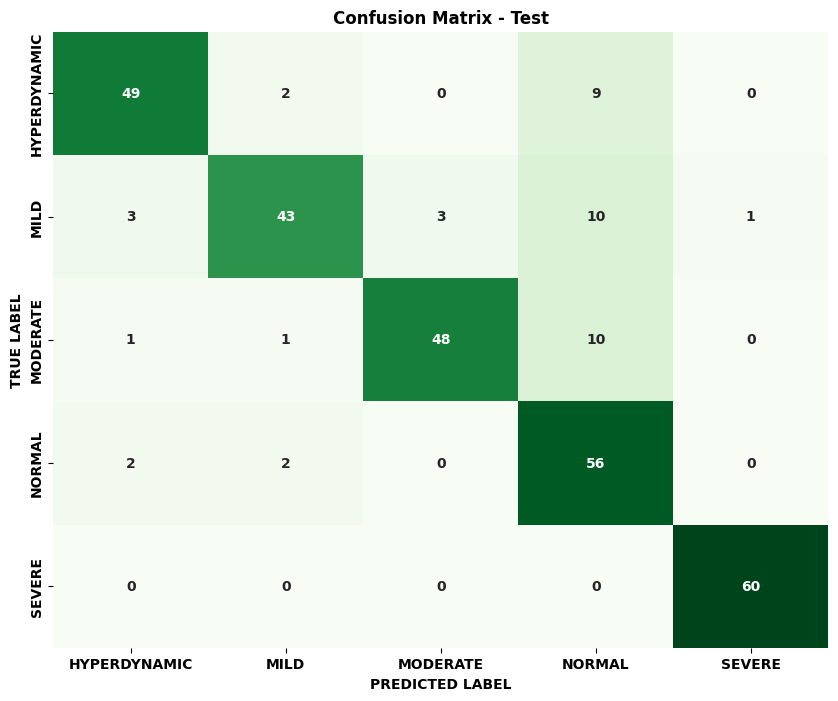

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


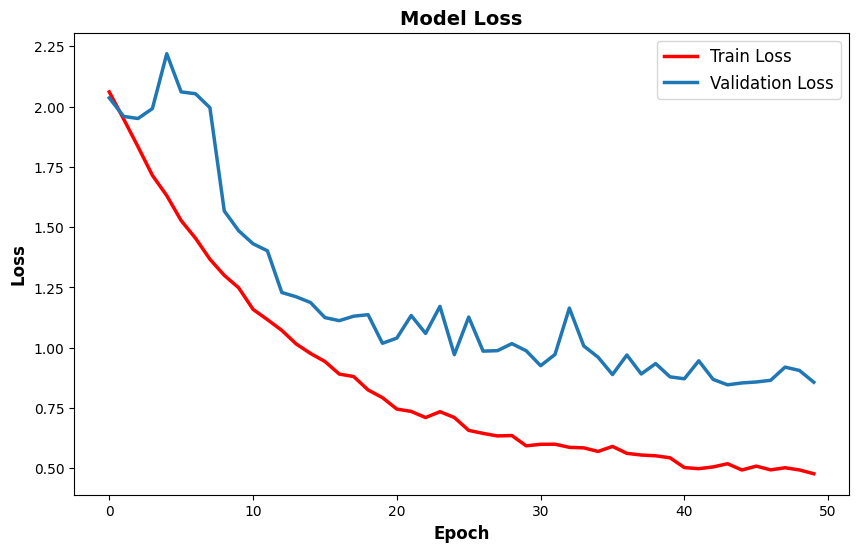

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

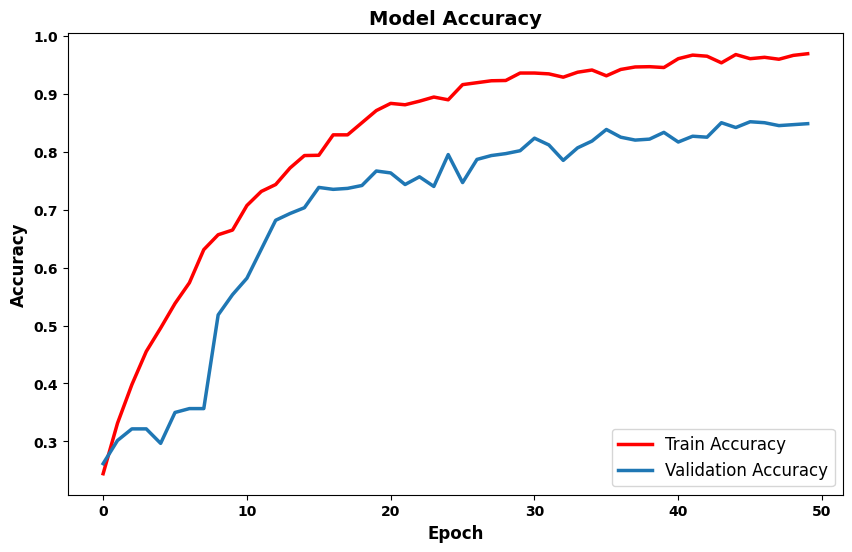

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [6]:
model.save('EFFICIENTNET_B1_ADAMW.h5')

In [7]:
#EFFICIENT NET B2 WITH ADAM
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb2_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB2 model
    base_model = EfficientNetB2(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb2_model(input_shape, NUM_CLASSES)

# Use Adam optimizer
optimizer = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718626549.489573     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718626549.637033     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/66 ━━━━━━━━━━━━━━━━━━━━ 3:57 5s/step - accuracy: 0.2011 - loss: 2.1208  

W0000 00:00:1718626655.230204     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2280 - loss: 2.0799

W0000 00:00:1718626683.200615     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.2283 - loss: 2.0794 - val_accuracy: 0.2433 - val_loss: 2.0239
Epoch 2/50


W0000 00:00:1718626696.846325     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 387ms/step - accuracy: 0.3382 - loss: 1.9380 - val_accuracy: 0.2867 - val_loss: 1.9876
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 397ms/step - accuracy: 0.3889 - loss: 1.8360 - val_accuracy: 0.3533 - val_loss: 1.8907
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 392ms/step - accuracy: 0.4395 - loss: 1.7208 - val_accuracy: 0.3850 - val_loss: 1.8845
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 395ms/step - accuracy: 0.5134 - loss: 1.5805 - val_accuracy: 0.4150 - val_loss: 1.8379
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 383ms/step - accuracy: 0.5739 - loss: 1.4770 - val_accuracy: 0.4467 - val_loss: 1.8034
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 388ms/step - accuracy: 0.6135 - loss: 1.4049 - val_accuracy: 0.4867 - val_loss: 1.7050
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 386ms/step - accuracy: 0.6514 - loss: 1.3017 - val_accuracy: 0.5100 - val_loss: 1.6737
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 385ms/step - accuracy: 0.6588 - loss: 1.2504 - val_accuracy: 0.536

W0000 00:00:1718628115.509404     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 9:12 8s/step

W0000 00:00:1718628244.607409     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 475ms/step


W0000 00:00:1718628275.493796     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.22      0.22      0.22       420
        MILD       0.19      0.20      0.19       420
    MODERATE       0.17      0.18      0.17       420
      NORMAL       0.20      0.20      0.20       420
      SEVERE       0.23      0.23      0.23       420

    accuracy                           0.20      2100
   macro avg       0.20      0.20      0.20      2100
weighted avg       0.20      0.20      0.20      2100



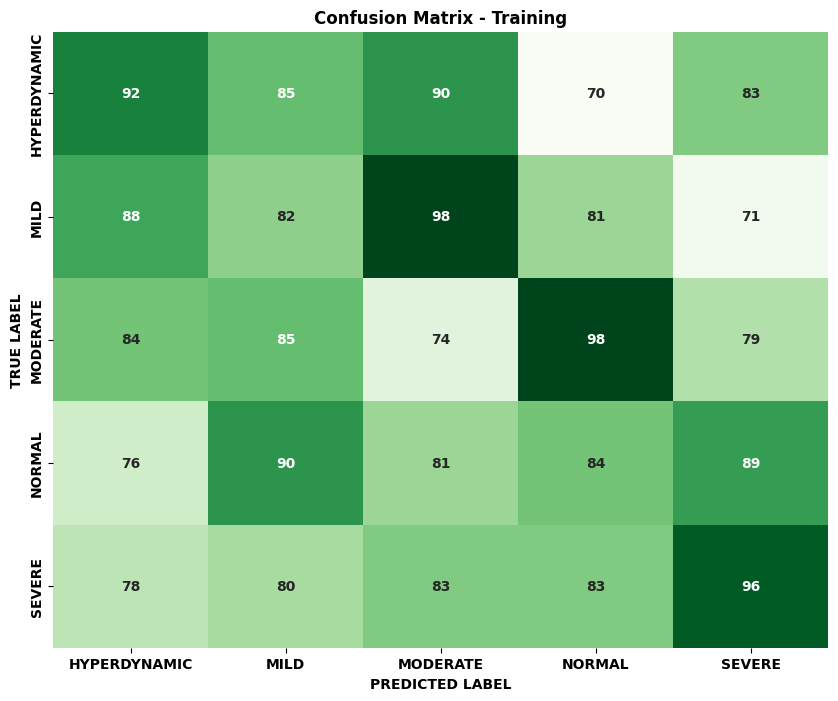

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step


W0000 00:00:1718628281.508689     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.17      0.19      0.18       120
        MILD       0.12      0.11      0.12       120
    MODERATE       0.20      0.21      0.20       120
      NORMAL       0.15      0.15      0.15       120
      SEVERE       0.27      0.25      0.26       120

    accuracy                           0.18       600
   macro avg       0.18      0.18      0.18       600
weighted avg       0.18      0.18      0.18       600



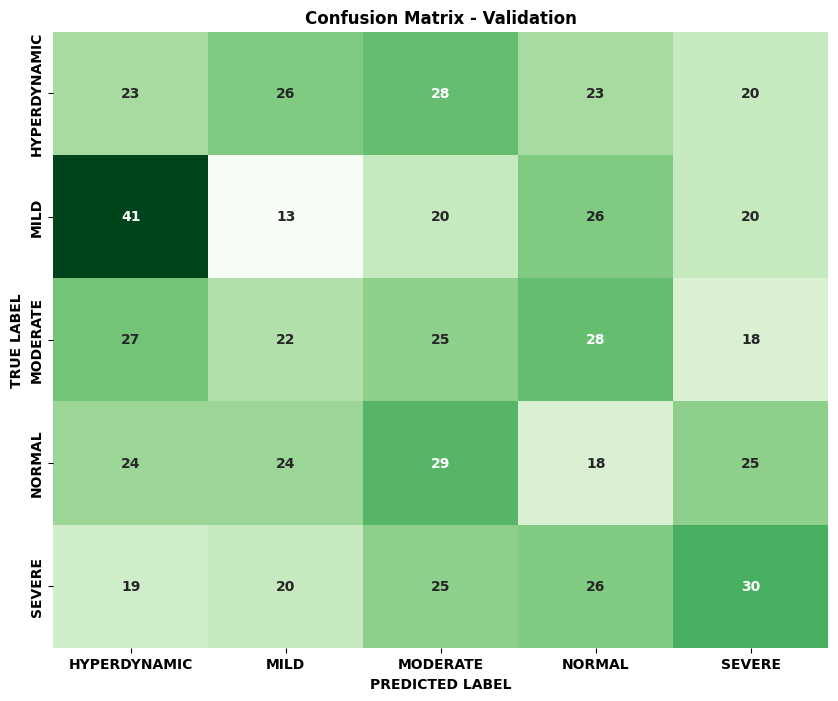

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 520ms/step


W0000 00:00:1718628286.713610     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.82      0.93      0.87        60
        MILD       0.90      0.77      0.83        60
    MODERATE       0.89      0.82      0.85        60
      NORMAL       0.76      0.85      0.80        60
      SEVERE       0.98      0.97      0.97        60

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



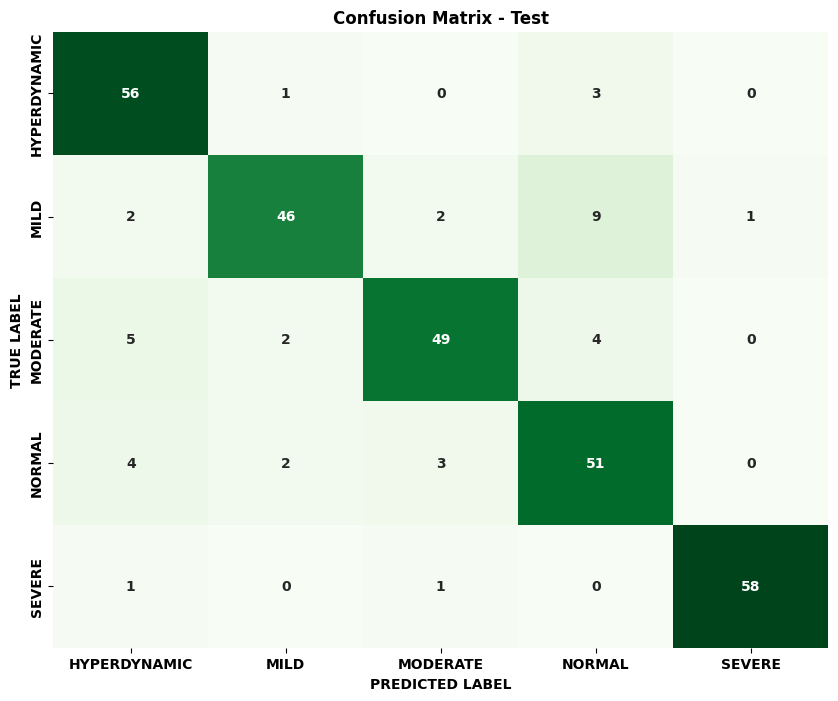

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


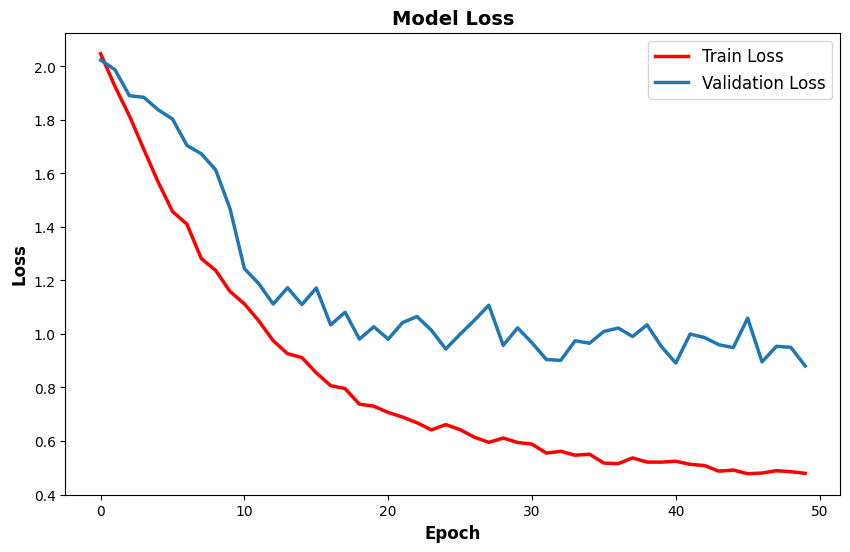

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

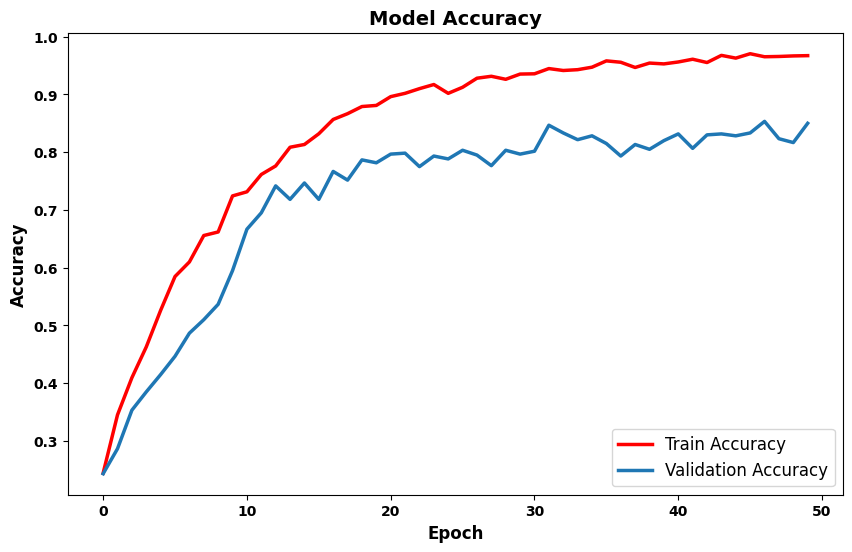

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [12]:
model.save('EFFICIENTNETB2_ADAM.h5')

In [13]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb2_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB2 model
    base_model = EfficientNetB2(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb2_model(input_shape, NUM_CLASSES)

# Use RMSprop optimizer
optimizer = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/66 ━━━━━━━━━━━━━━━━━━━━ 1:48:00 100s/step - accuracy: 0.1250 - loss: 2.1177

W0000 00:00:1718628918.816698     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


49/66 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2093 - loss: 2.1046  

W0000 00:00:1718628998.862045     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2165 - loss: 2.0932

W0000 00:00:1718629011.020481     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.2169 - loss: 2.0927 - val_accuracy: 0.2350 - val_loss: 2.0206
Epoch 2/50


W0000 00:00:1718629016.249381     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 392ms/step - accuracy: 0.3126 - loss: 1.9435 - val_accuracy: 0.2633 - val_loss: 1.9760
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 383ms/step - accuracy: 0.3949 - loss: 1.8282 - val_accuracy: 0.3383 - val_loss: 1.9152
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 382ms/step - accuracy: 0.4757 - loss: 1.6749 - val_accuracy: 0.4117 - val_loss: 1.8084
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 379ms/step - accuracy: 0.5283 - loss: 1.5899 - val_accuracy: 0.4183 - val_loss: 1.7575
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 394ms/step - accuracy: 0.5681 - loss: 1.5258 - val_accuracy: 0.4250 - val_loss: 1.7688
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 374ms/step - accuracy: 0.5963 - loss: 1.4101 - val_accuracy: 0.4467 - val_loss: 1.7653
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 384ms/step - accuracy: 0.6269 - loss: 1.3517 - val_accuracy: 0.4433 - val_loss: 1.7482
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 383ms/step - accuracy: 0.6428 - loss: 1.2917 - val_accuracy: 0.516

W0000 00:00:1718630434.362435     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 7:22 7s/step

W0000 00:00:1718630451.139544     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 37s 469ms/step


W0000 00:00:1718630481.621200     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.23      0.23      0.23       420
        MILD       0.20      0.20      0.20       420
    MODERATE       0.22      0.22      0.22       420
      NORMAL       0.19      0.19      0.19       420
      SEVERE       0.23      0.23      0.23       420

    accuracy                           0.21      2100
   macro avg       0.21      0.21      0.21      2100
weighted avg       0.21      0.21      0.21      2100



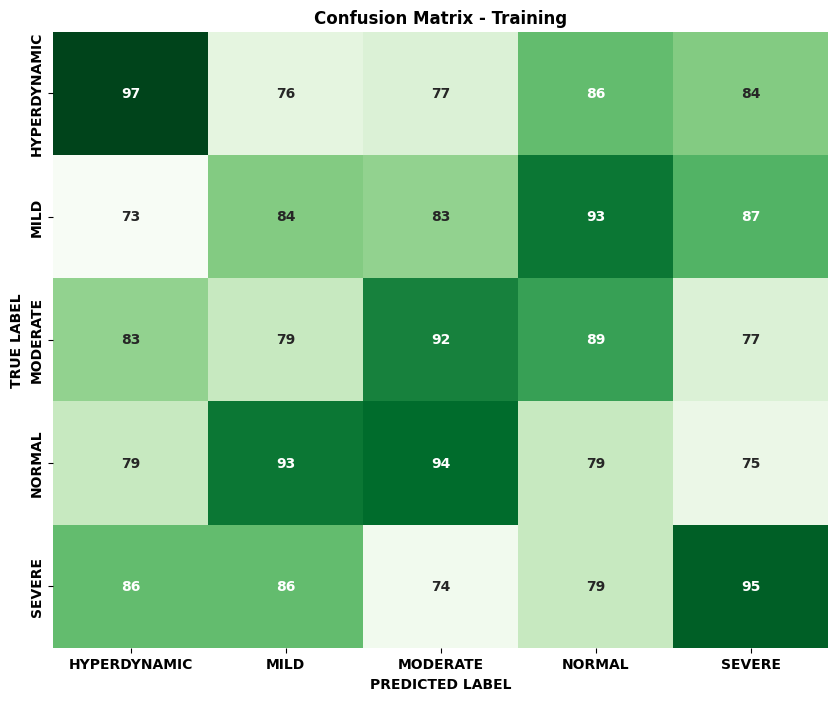

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step


W0000 00:00:1718630486.685954     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.20      0.21      0.20       120
        MILD       0.21      0.20      0.20       120
    MODERATE       0.20      0.20      0.20       120
      NORMAL       0.20      0.20      0.20       120
      SEVERE       0.19      0.19      0.19       120

    accuracy                           0.20       600
   macro avg       0.20      0.20      0.20       600
weighted avg       0.20      0.20      0.20       600



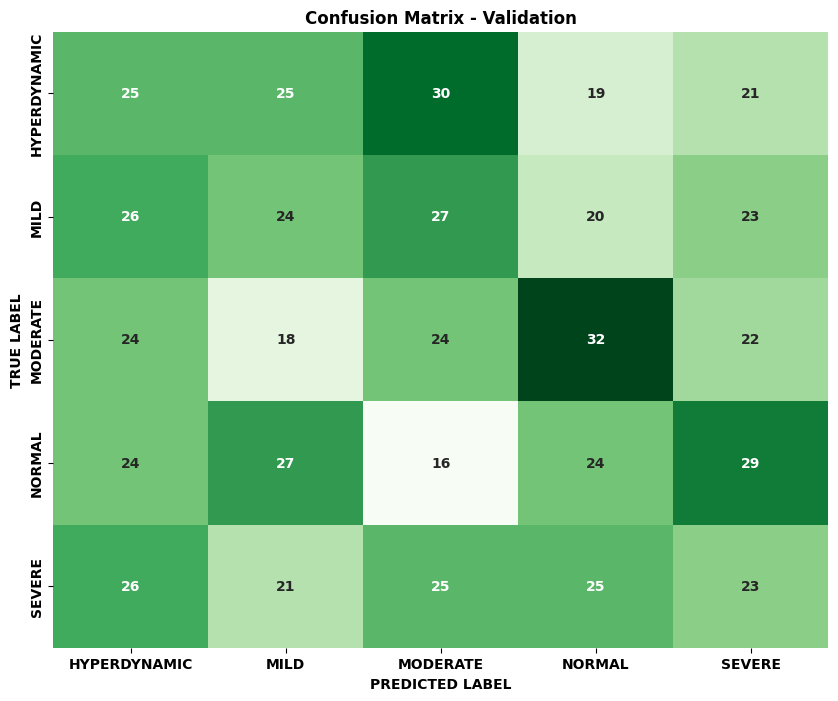

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step


W0000 00:00:1718630491.429244     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.81      0.90      0.85        60
        MILD       0.87      0.77      0.81        60
    MODERATE       0.86      0.82      0.84        60
      NORMAL       0.77      0.82      0.79        60
      SEVERE       0.95      0.93      0.94        60

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



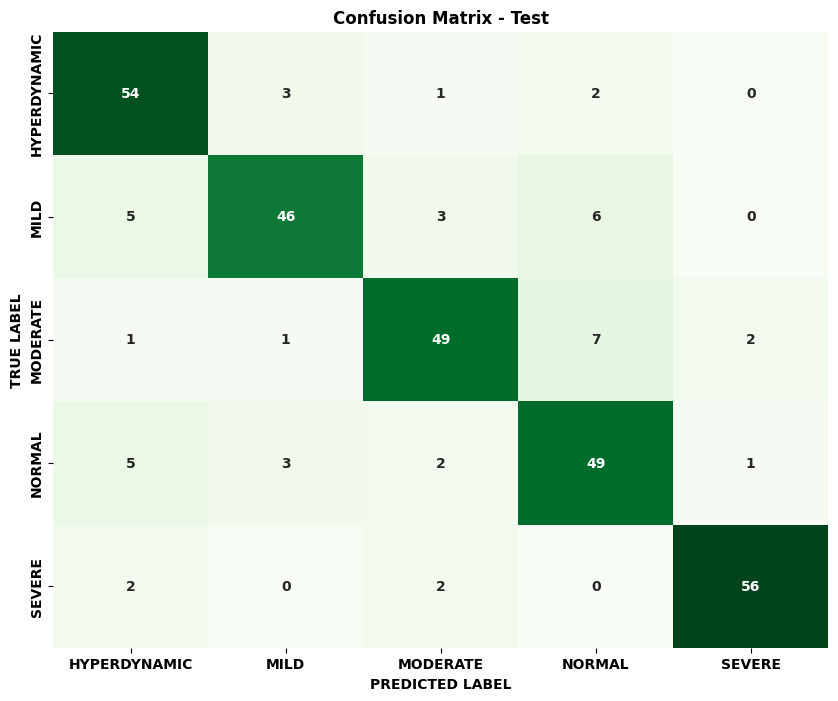

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


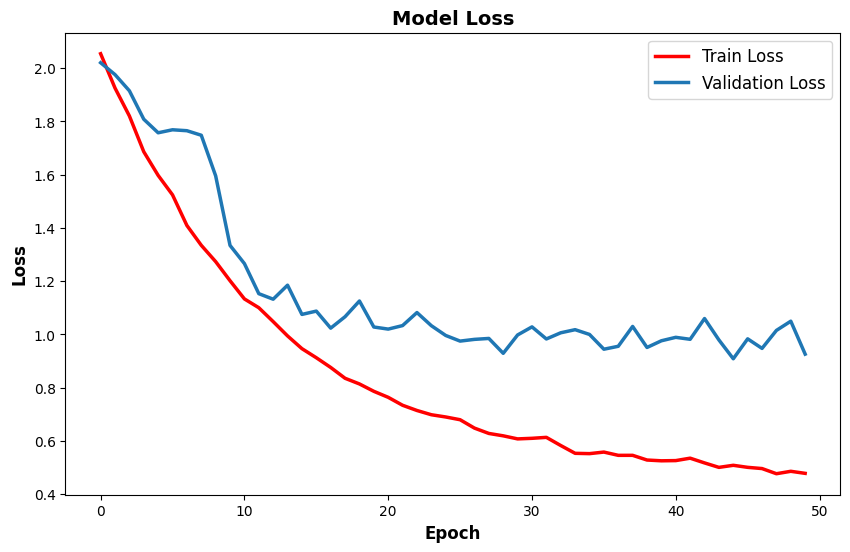

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

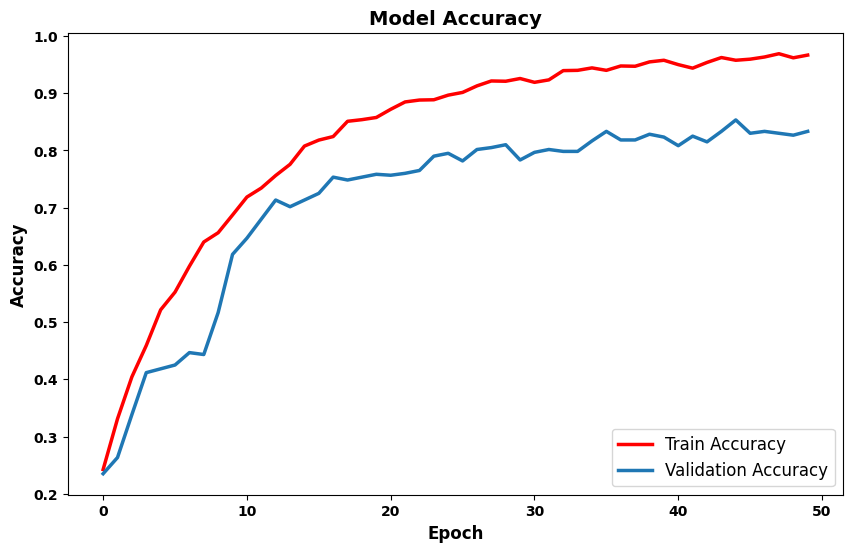

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [23]:
model.save('EFFICIENTNETB2_RMS.h5')

In [ ]:
##efficient net b2 with sgd optimizer
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb2_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB2 model
    base_model = EfficientNetB2(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb2_model(input_shape, NUM_CLASSES)

# Use SGD optimizer
optimizer = optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb2_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB2 model
    base_model = EfficientNetB2(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train'  # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation'  # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test'  # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb2_model(input_shape, NUM_CLASSES)

# Use AdamW optimizer
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb3_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB3 model
    base_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train' # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation' # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test' # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb3_model(input_shape, NUM_CLASSES)

# Use Adam optimizer
optimizer = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Save metrics to Excel files (you can define this function as needed)
# save_metrics_to_excel(history, val_loss, val_accuracy, test_loss, test_accuracy, training_file, validation_file, test_file)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2024-06-17 22:43:49.165425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 22:43:49.165557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 22:43:49.295605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718664410.066416     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718664410.231043     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/66 ━━━━━━━━━━━━━━━━━━━━ 2:13 4s/step - accuracy: 0.1952 - loss: 2.1426  

W0000 00:00:1718664531.910643     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2057 - loss: 2.1170

W0000 00:00:1718664558.880092     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.2059 - loss: 2.1164 - val_accuracy: 0.2717 - val_loss: 1.9985
Epoch 2/50


W0000 00:00:1718664574.539496     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 458ms/step - accuracy: 0.3128 - loss: 1.9592 - val_accuracy: 0.3150 - val_loss: 1.9397
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 465ms/step - accuracy: 0.4141 - loss: 1.8368 - val_accuracy: 0.3317 - val_loss: 1.9070
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 464ms/step - accuracy: 0.4394 - loss: 1.6995 - val_accuracy: 0.2917 - val_loss: 2.0326
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 464ms/step - accuracy: 0.5244 - loss: 1.5797 - val_accuracy: 0.3217 - val_loss: 2.1035
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 459ms/step - accuracy: 0.5738 - loss: 1.4664 - val_accuracy: 0.3200 - val_loss: 2.2478
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 470ms/step - accuracy: 0.6475 - loss: 1.3198 - val_accuracy: 0.4133 - val_loss: 2.0639
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 457ms/step - accuracy: 0.6759 - loss: 1.2570 - val_accuracy: 0.4750 - val_loss: 1.9251
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 458ms/step - accuracy: 0.7181 - loss: 1.1718 - val_accuracy: 0.488

W0000 00:00:1718666259.021799     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 2/66 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step

W0000 00:00:1718667246.925844     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 571ms/step


W0000 00:00:1718667284.026019     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.19      0.19      0.19       420
        MILD       0.21      0.21      0.21       420
    MODERATE       0.21      0.21      0.21       420
      NORMAL       0.20      0.20      0.20       420
      SEVERE       0.23      0.23      0.23       420

    accuracy                           0.21      2100
   macro avg       0.21      0.21      0.21      2100
weighted avg       0.21      0.21      0.21      2100



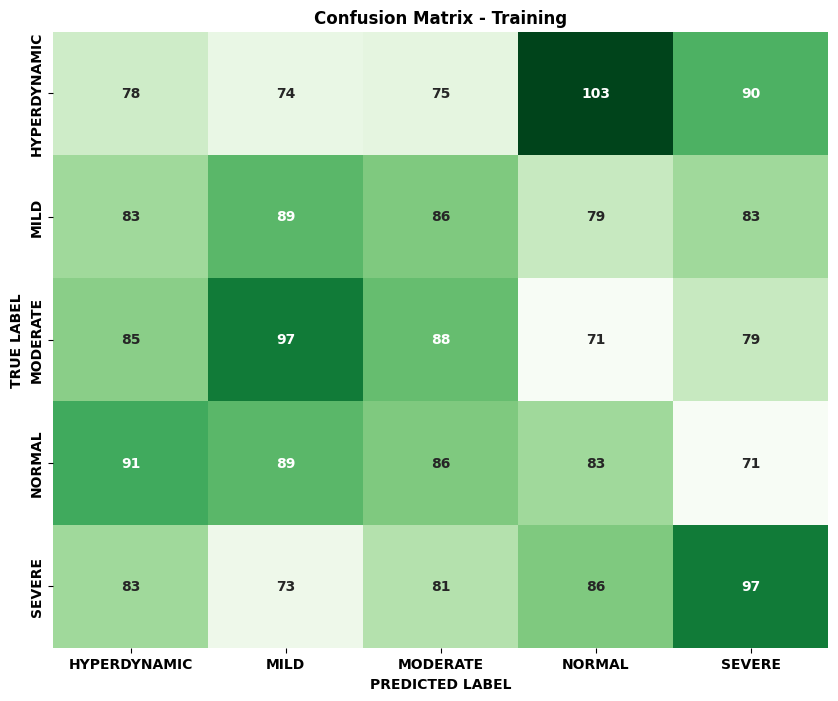

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step


W0000 00:00:1718667290.600437     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.22      0.24      0.23       120
        MILD       0.21      0.19      0.20       120
    MODERATE       0.24      0.17      0.20       120
      NORMAL       0.18      0.23      0.20       120
      SEVERE       0.22      0.22      0.22       120

    accuracy                           0.21       600
   macro avg       0.21      0.21      0.21       600
weighted avg       0.21      0.21      0.21       600



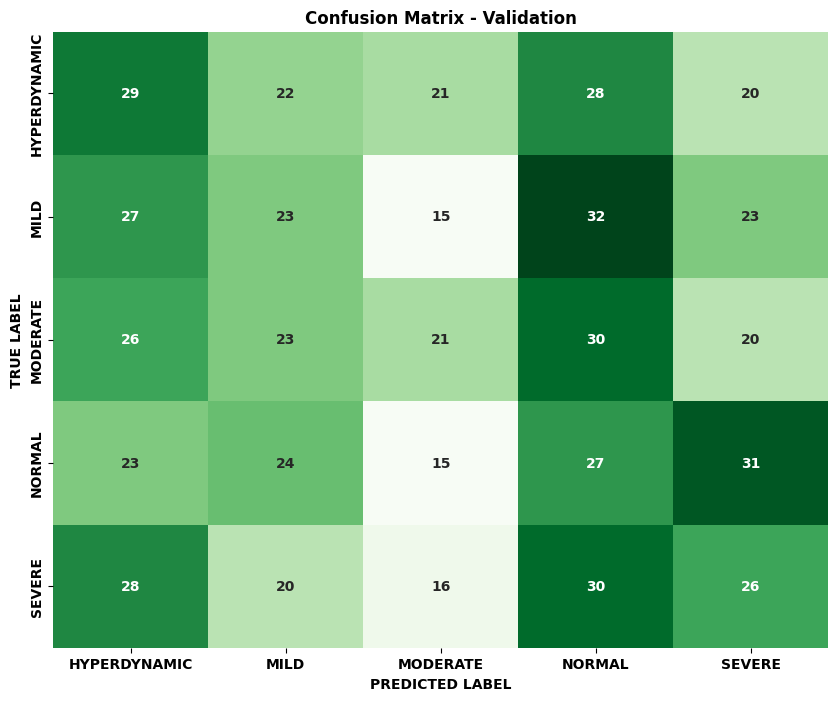

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 588ms/step


W0000 00:00:1718667296.486313     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.79      0.92      0.85        60
        MILD       0.83      0.87      0.85        60
    MODERATE       0.97      0.65      0.78        60
      NORMAL       0.77      0.82      0.79        60
      SEVERE       0.94      0.98      0.96        60

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.84       300
weighted avg       0.86      0.85      0.84       300



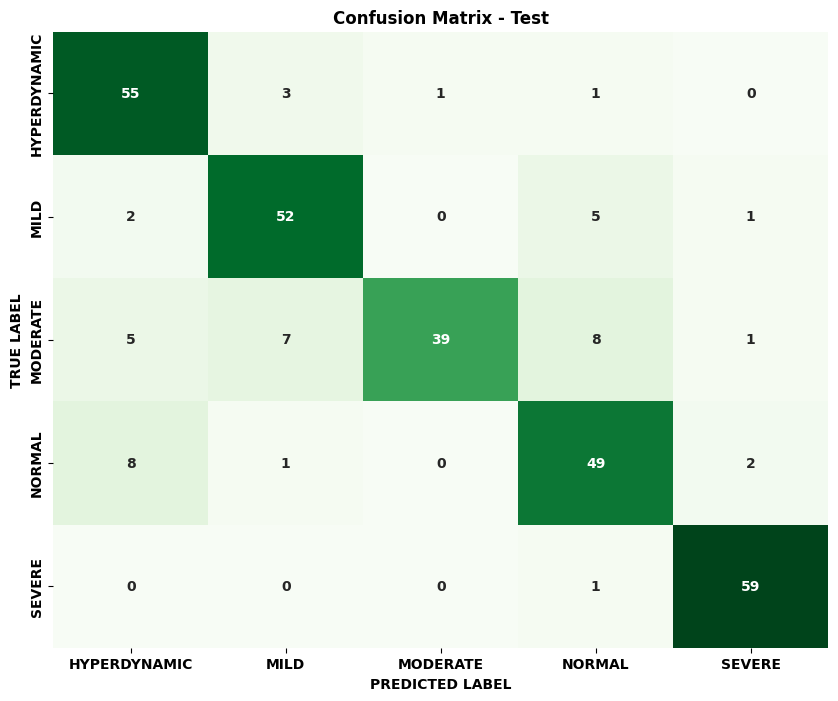

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


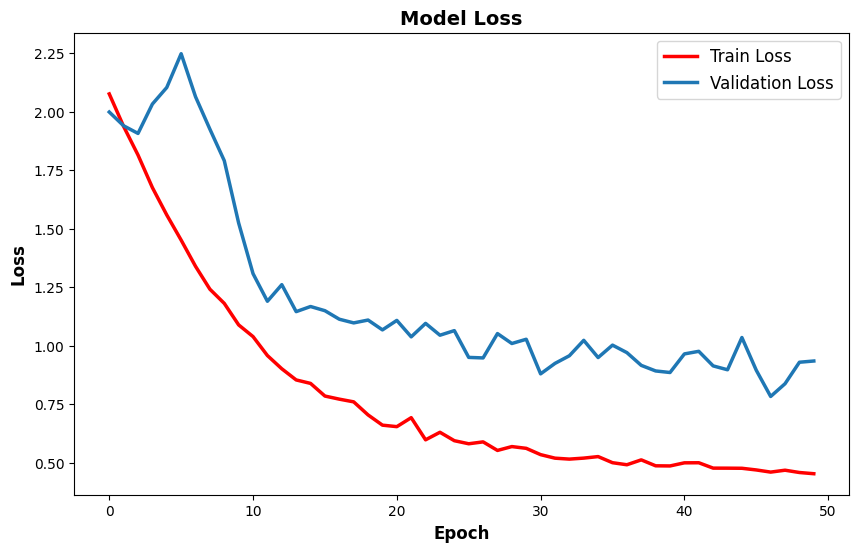

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

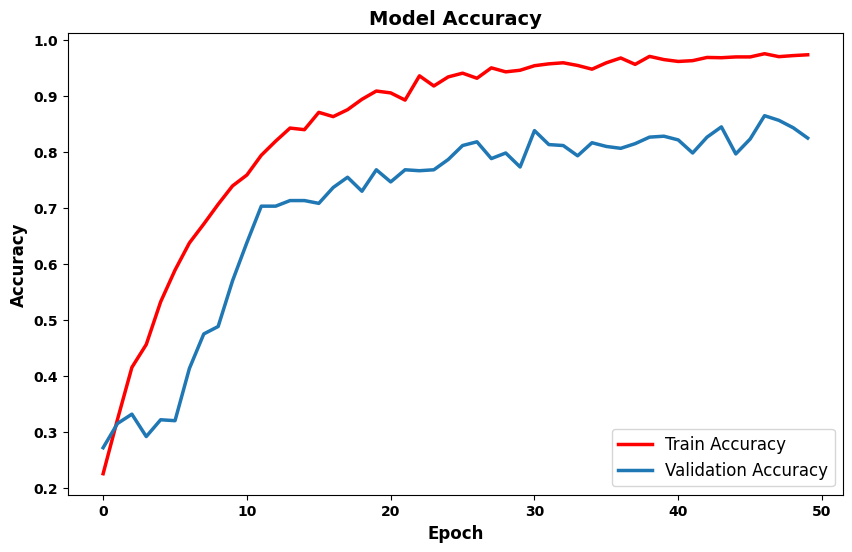

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [5]:
model.save('EFFICIENTNETB3_ADAM.h5')

In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_efficientnetb3_model(input_shape, num_classes):
    # Load the pre-trained EfficientNetB3 model
    base_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the base model layers to be trainable (no freezing)
    base_model.trainable = True
    
    # Add custom head for classification with Dropout and L1, L2 regularization
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(0.4)(x)  # Add dropout layer
    x = layers.Dense(num_classes, 
                     activation='softmax', 
                     kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                     activity_regularizer=regularizers.l1(0.01))(x)  # L1 regularization
    
    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model

# Define parameters and paths
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_CLASSES = 5
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/train' # Replace with your training data path
VAL_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/validation' # Replace with your validation data path
TEST_PATH = '/kaggle/input/heart-ttv-3/HEART_3_TTV/test' # Replace with your test data path

# Data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.1
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training images in batches from directory
train_ds = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches from directory
val_ds = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches from directory
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Input shape for RGB images

# Build the model
model = build_efficientnetb3_model(input_shape, NUM_CLASSES)

# Use RMSprop optimizer
optimizer = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without learning rate scheduler and early stopping
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Save metrics to Excel files (you can define this function as needed)
# save_metrics_to_excel(history, val_loss, val_accuracy, test_loss, test_accuracy, training_file, validation_file, test_file)

# Print final metrics
print("Training Metrics:")
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Metrics:")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Metrics:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 2100 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
W0000 00:00:1718667627.660940     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/66 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.2206 - loss: 2.1109  

W0000 00:00:1718667723.691289     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2238 - loss: 2.1026

W0000 00:00:1718667737.933042     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.2240 - loss: 2.1021 - val_accuracy: 0.2633 - val_loss: 2.0087
Epoch 2/50


W0000 00:00:1718667743.470831     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 458ms/step - accuracy: 0.3295 - loss: 1.9556 - val_accuracy: 0.3067 - val_loss: 1.9395
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 463ms/step - accuracy: 0.4113 - loss: 1.8149 - val_accuracy: 0.3433 - val_loss: 1.9014
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 476ms/step - accuracy: 0.4705 - loss: 1.6975 - val_accuracy: 0.4367 - val_loss: 1.7950
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 457ms/step - accuracy: 0.5060 - loss: 1.6082 - val_accuracy: 0.4400 - val_loss: 1.7595
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 458ms/step - accuracy: 0.5651 - loss: 1.4794 - val_accuracy: 0.4767 - val_loss: 1.6686
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 453ms/step - accuracy: 0.5956 - loss: 1.3928 - val_accuracy: 0.4833 - val_loss: 1.6703
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 452ms/step - accuracy: 0.6464 - loss: 1.2957 - val_accuracy: 0.5067 - val_loss: 1.6317
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 455ms/step - accuracy: 0.6839 - loss: 1.2263 - val_accuracy: 0.556

W0000 00:00:1718669407.246604     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/66 ━━━━━━━━━━━━━━━━━━━━ 8:29 8s/step

W0000 00:00:1718669972.925919     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 545ms/step


W0000 00:00:1718670008.339398     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Training Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.17      0.17      0.17       420
        MILD       0.17      0.17      0.17       420
    MODERATE       0.18      0.19      0.18       420
      NORMAL       0.21      0.21      0.21       420
      SEVERE       0.21      0.21      0.21       420

    accuracy                           0.19      2100
   macro avg       0.19      0.19      0.19      2100
weighted avg       0.19      0.19      0.19      2100



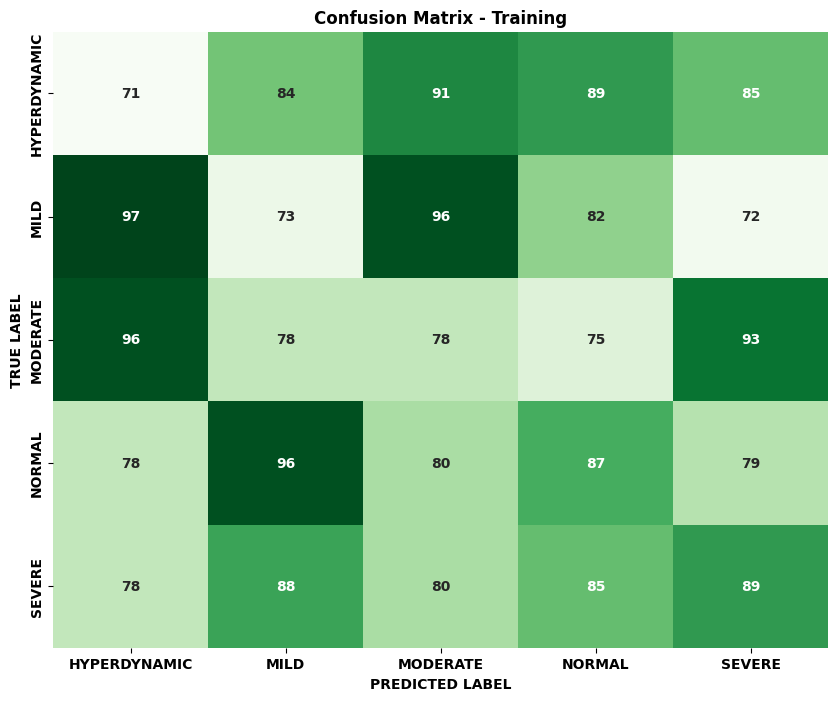

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step


W0000 00:00:1718670013.825371     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Validation Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.18      0.20      0.19       120
        MILD       0.24      0.21      0.22       120
    MODERATE       0.18      0.17      0.17       120
      NORMAL       0.18      0.20      0.19       120
      SEVERE       0.13      0.12      0.13       120

    accuracy                           0.18       600
   macro avg       0.18      0.18      0.18       600
weighted avg       0.18      0.18      0.18       600



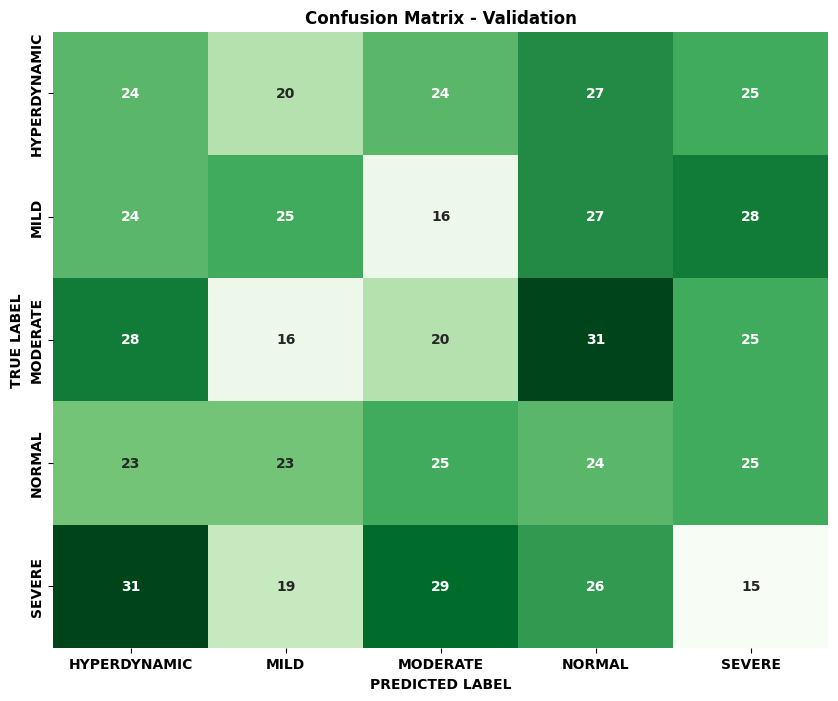

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step


W0000 00:00:1718670018.651075     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Classification Report:
              precision    recall  f1-score   support

HYPERDYNAMIC       0.81      0.90      0.85        60
        MILD       0.86      0.72      0.78        60
    MODERATE       0.85      0.73      0.79        60
      NORMAL       0.74      0.87      0.80        60
      SEVERE       0.93      0.95      0.94        60

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



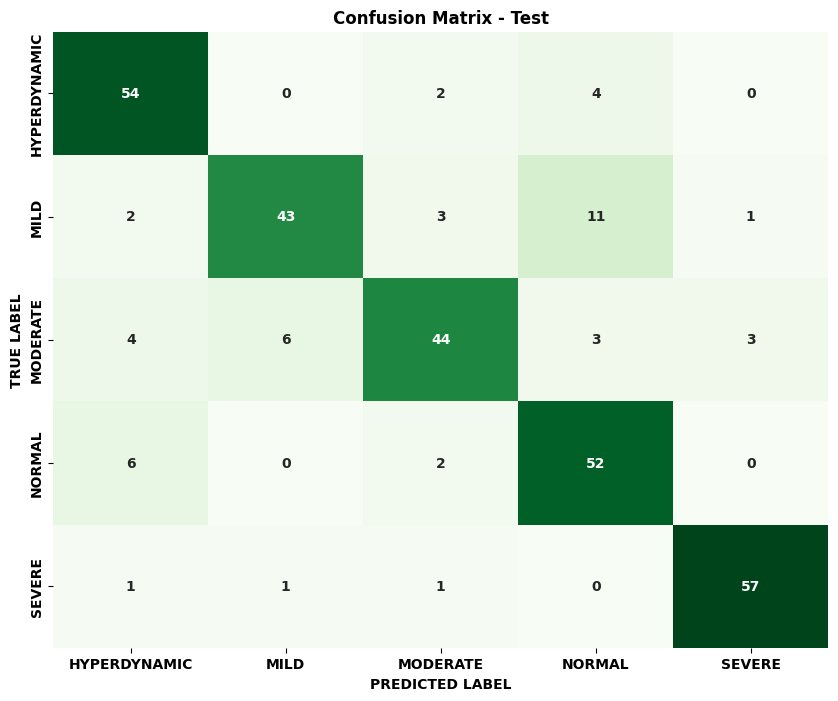

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_classification_report_and_confusion_matrix(model, dataset, dataset_type):
    # Predict classes
    predictions = model.predict(dataset)
    y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels
    y_true = dataset.classes

    # Get class labels
    class_labels = list(dataset.class_indices.keys())

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(f"\n{dataset_type} Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_labels, f'Confusion Matrix - {dataset_type}')

    return report

def plot_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, cbar=False,
                annot_kws={"weight": "bold"})
    plt.title(title, fontweight='bold')
    plt.xlabel('PREDICTED LABEL', fontweight='bold')
    plt.ylabel('TRUE LABEL', fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()

# Assuming `model`, `train_ds`, `val_ds`, and `test_ds` are already defined elsewhere in your code

# Generate classification reports and confusion matrices
train_report = generate_classification_report_and_confusion_matrix(model, train_ds, 'Training')
val_report = generate_classification_report_and_confusion_matrix(model, val_ds, 'Validation')
test_report = generate_classification_report_and_confusion_matrix(model, test_ds, 'Test')


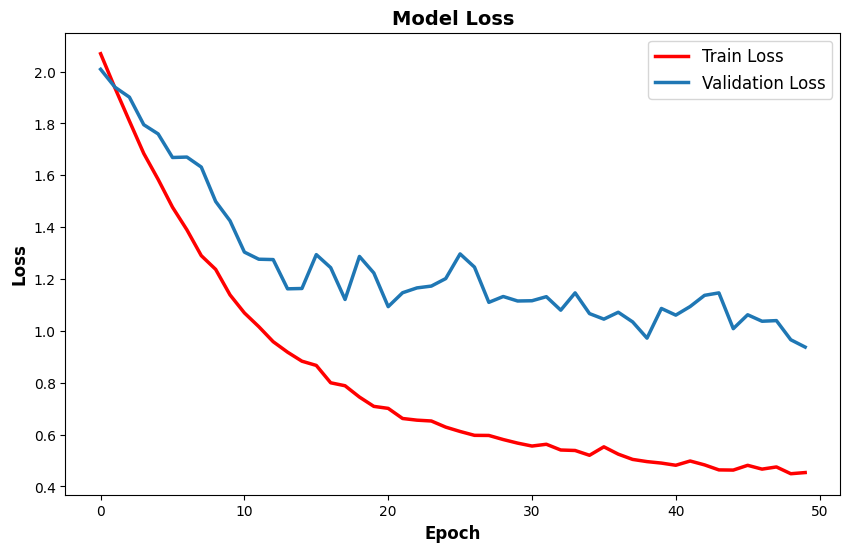

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot training loss in red
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2.5)

# Plot validation loss in default blue
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)

# Customize plot appearance
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Set font weight of x-axis and y-axis labels to bold
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show plot
plt.show()

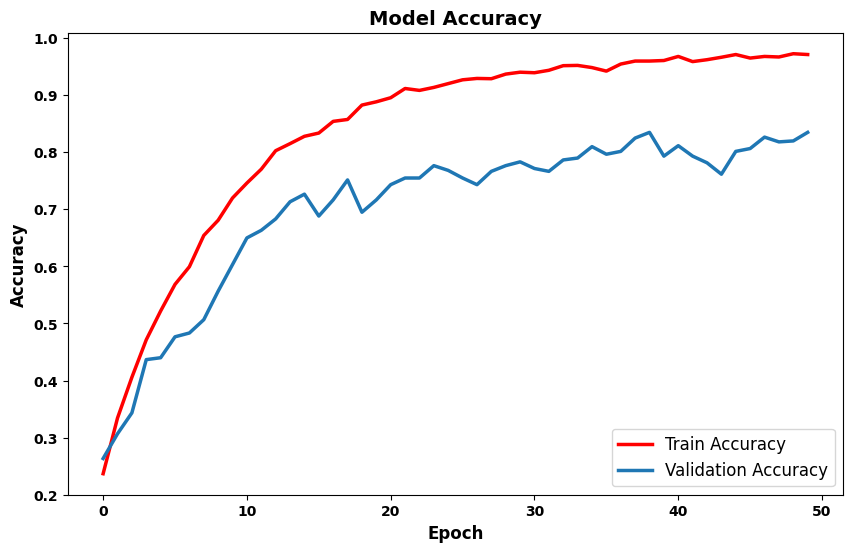

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))

# Plot training accuracy in red
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red', linewidth=2.5)

# Plot validation accuracy in default blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)

# Customize plot appearance
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Set font weight of x-axis tick labels to bold
plt.yticks(fontsize=10, fontweight='bold')  # Set font weight of y-axis tick labels to bold
plt.grid(False)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()

In [13]:
model.save('EFFICIENTNETB3_RMS.h5')